# Microsoft Malware detection

<h1> Exploratory Data Analysis</h1>

In [1]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9,mr;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/4117/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1573651107&Signature=eVdsHpAsbEHJv38phBR%2BnDQ5Bx61cdbE%2F3%2Fe1QEG0NFcT5L%2Fh9JWdUC5iXVUlV%2FdpDoA6Do1k5f3QrRgHgfPHxwBxHZQhFHNJ9pf0d9sRnpgxeAnNSkM1QHYWkk3odfN%2FPXPooyrBNfcdD3uKqqbYBfBXmCPXJH71CB1k6Os7VoCYuFXGwmPB6WGBthFX84t%2F1QBgA1DaWO8UVqTtGt3DqHRZPBqB8QL4drwQ0dCfIsnnSLIM%2FcZOvrnoKYuaWZ18n9wwWRMfcamF8JTRI3qhOqsL%2Bv5UZlVHO%2FOHZb2ww1jyCf73q8JiAr8GGiJ6PJVs7FIigQ5vXDf3cyyx1ltVQ%3D%3D" -O "train.7z" -c

--2019-11-10 13:19:04--  https://storage.googleapis.com/kaggle-competitions-data/kaggle/4117/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1573651107&Signature=eVdsHpAsbEHJv38phBR%2BnDQ5Bx61cdbE%2F3%2Fe1QEG0NFcT5L%2Fh9JWdUC5iXVUlV%2FdpDoA6Do1k5f3QrRgHgfPHxwBxHZQhFHNJ9pf0d9sRnpgxeAnNSkM1QHYWkk3odfN%2FPXPooyrBNfcdD3uKqqbYBfBXmCPXJH71CB1k6Os7VoCYuFXGwmPB6WGBthFX84t%2F1QBgA1DaWO8UVqTtGt3DqHRZPBqB8QL4drwQ0dCfIsnnSLIM%2FcZOvrnoKYuaWZ18n9wwWRMfcamF8JTRI3qhOqsL%2Bv5UZlVHO%2FOHZb2ww1jyCf73q8JiAr8GGiJ6PJVs7FIigQ5vXDf3cyyx1ltVQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c1f::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18810691091 (18G) [application/x-7z-compressed]
Saving to: ‘train.7z’

train.7z            100%[===================>]  17.52G  81.6MB/s    in 5m 18s  

2019-11-10 13:24:22 (56.4 MB/s) -

In [2]:
pip install pyunpack

  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp35-none-any.whl size=6637 sha256=42bb37b69b8acaaacf86a56770c584be279e8b45ff7895c7e68209b026ae377e
  Stored in directory: /home/gauravkavhar304/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/local/lib/python3.5/dist-packages/easyprocess'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install patool

     |████████████████████████████████| 81kB 2.0MB/s eta 0:00:011
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/local/lib/python3.5/dist-packages/_patool_configdata.py'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install patool --user

  Using cached https://files.pythonhosted.org/packages/43/94/52243ddff508780dd2d8110964320ab4851134a55ab102285b46e740f76a/patool-1.12-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import patoolib
patoolib.extract_archive("train.7z")

patool: Extracting train.7z ...
patool: running /usr/bin/7z x -o./Unpack_jxr2stze -- train.7z
patool: ... train.7z extracted to `train'.


'train'

In [3]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [19]:
#separating byte files and asm files 

#source = 'train'
source = 'asmFiles'
destination = 'byteFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination):
    os.makedirs(destination)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
#     os.rename(source,'asmFiles')
#     source='asmFiles'
    data_files = os.listdir(source)
    for file in data_files:                      #for file in asm_files:
        if (file.endswith("bytes")):
            shutil.move(source+'/'+file,destination) #shutil.move(source+'/'+file,destination)

<h2>Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


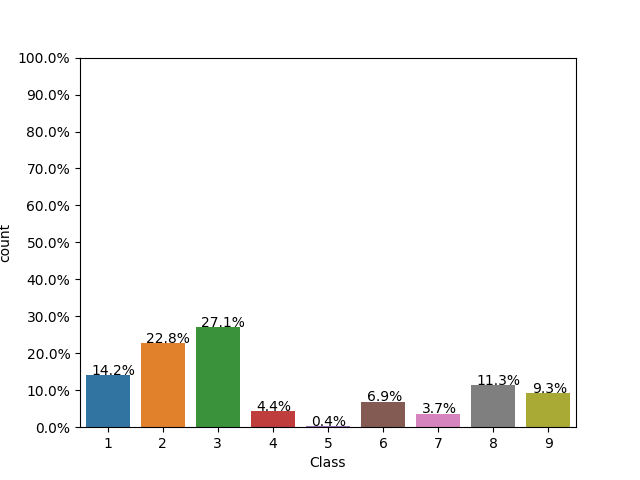

In [4]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>Feature extraction </h2>

<h3>File size  of byte files as a feature </h3>

In [5]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

   Class                    ID      size
0      8  gCQ70meuzrYAFaWDxZJv  2.024902
1      6  I2QaRs1y4TmZVLwWCPv7  0.708008
2      1  DoEYOjCZuGA3x4JSgW5d  0.736328
3      2  4iNJaXWGlkyVroOfHMqg  8.425293
4      1  ilogAd4QsU38IFBcuwDp  6.315430


<h3>box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


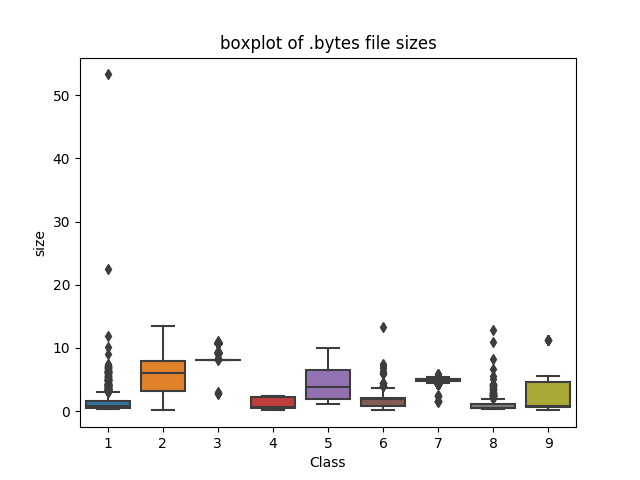

In [22]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>feature extraction from byte files </h3>

In [0]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(f.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file,"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file)
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
for file in files:
    filenames2.append(f)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i in feature_matrix[k]:
        byte_feature_file.write(str(i)+",")
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [5]:
byte_features=pd.read_csv("result.csv")
print (byte_features.head())

                         ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5.txt  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB.txt   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU.txt   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju.txt   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl.txt   19764   710   302   433   559   410   262   249   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff     ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753   1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902   8588  
2  9107  ...  2325  2358  2242  2885  2863  2471  2786   2680  49144    468  
3  1078  ...   478   873   485   462   516  1133   471    761   7998  13940  
4   422  ...   847   947   350   209   239   653   221    242   2199   9008  

[5 rows x 258 columns]


In [6]:
result = pd.read_csv('result_with_size.csv')
result.head()

Unnamed: 0                    ID       0     1     2     3     4     5  \
0           0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242   
1           1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844   
2           2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330   
3           3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   
4           4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   

      6     7  ...    f9    fa    fb    fc    fd     fe     ff     ??  \
0  3650  3201  ...  3101  3211  3097  2758  3099   2759   5753   1824   
1  8420  7589  ...   439   281   302  7639   518  17001  54902   8588   
2  9007  2342  ...  2242  2885  2863  2471  2786   2680  49144    468   
3   550   523  ...   485   462   516  1133   471    761   7998  13940   
4   262   249  ...   350   209   239   653   221    242   2199   9008   

       size  Class  
0  4.234863      9  
1  5.538818      2  
2  3.887939      9  
3  0.574219      1  
4  0.370850      8  

[5 rows x 261 columns]

In [7]:
result = result.drop(['Unnamed: 0'],axis=1)

In [8]:
result.head()

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   

      8  ...    f9    fa    fb    fc    fd     fe     ff     ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753   1824  4.234863   
1  9291  ...   439   281   302  7639   518  17001  54902   8588  5.538818   
2  9107  ...  2242  2885  2863  2471  2786   2680  49144    468  3.887939   
3  1078  ...   485   462   516  1133   471    761   7998  13940  0.574219   
4   422  ...   350   209   239   653   221    242   2199   9008  0.370850   

   Class  
0      9  
1      2  
2      9  
3      1  
4      8  

[5 rows x 260 columns]

In [9]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(result)

In [10]:
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

<h3>Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


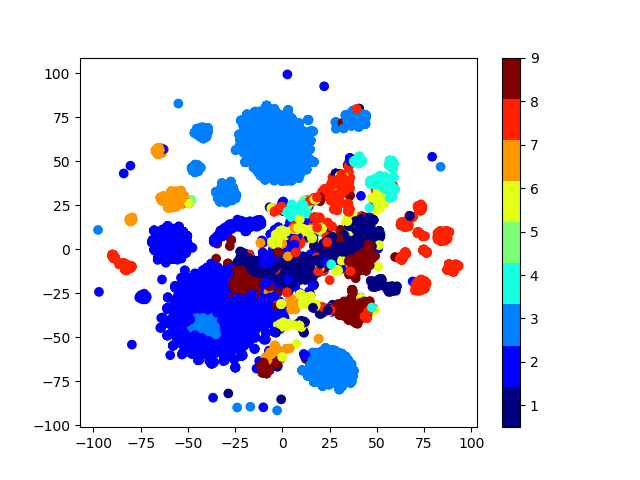

In [19]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


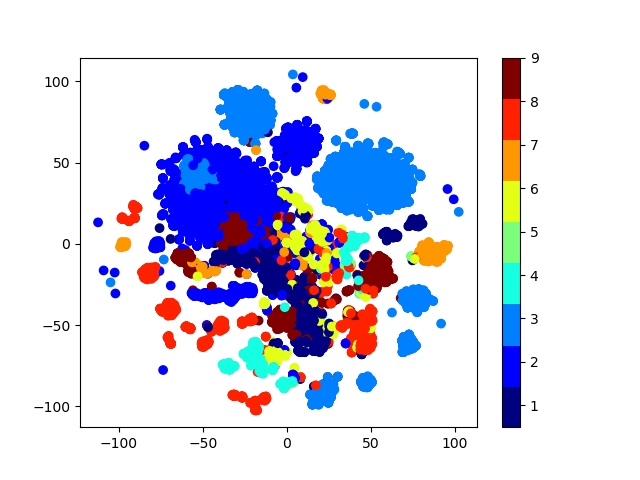

In [20]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [11]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [14]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


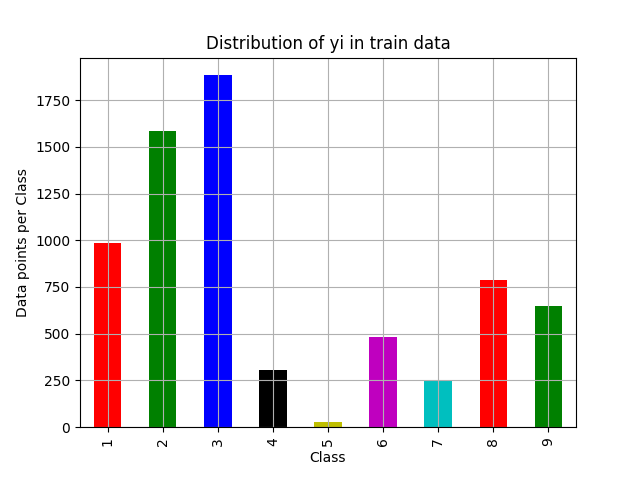

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


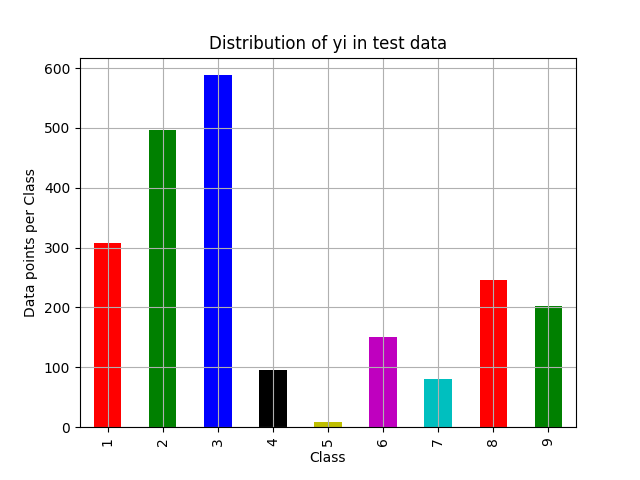

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


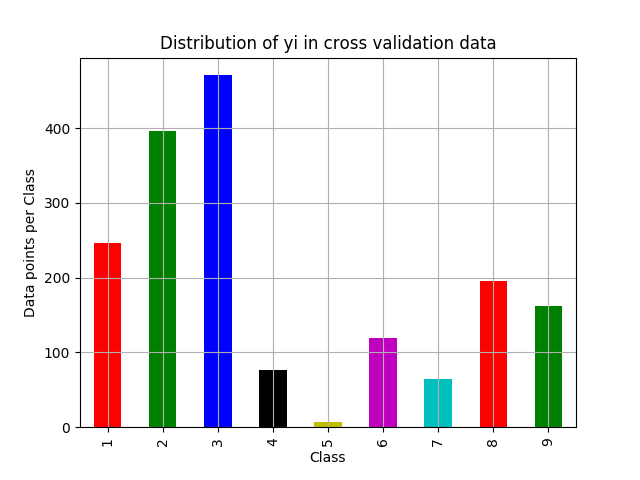

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [24]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors=['r', 'g', 'b', 'k', 'y', 'm', 'c'] 
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors=['r', 'g', 'b', 'k', 'y', 'm', 'c'] 
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors=['r', 'g', 'b', 'k', 'y', 'm', 'c'] 
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [25]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h2>Machine Learning Models on bytes files</h2>

<h3>Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.4186773554918277
Log loss on Test Data using Random Model 2.4821253566253523
Number of misclassified points  89.0984360625575
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


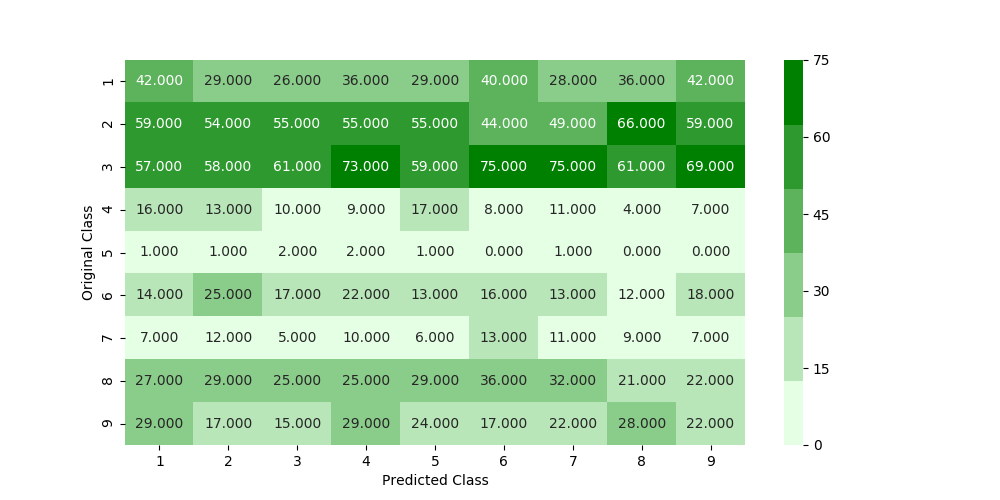

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


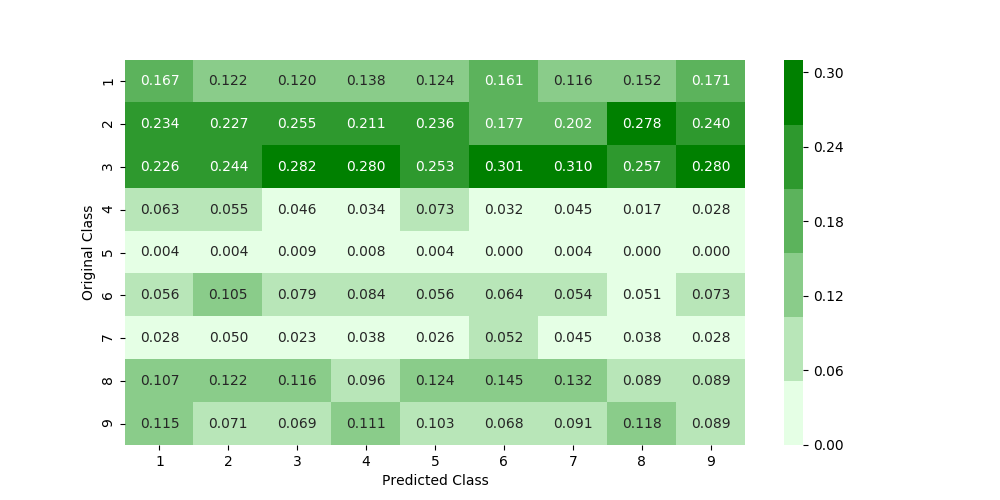

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


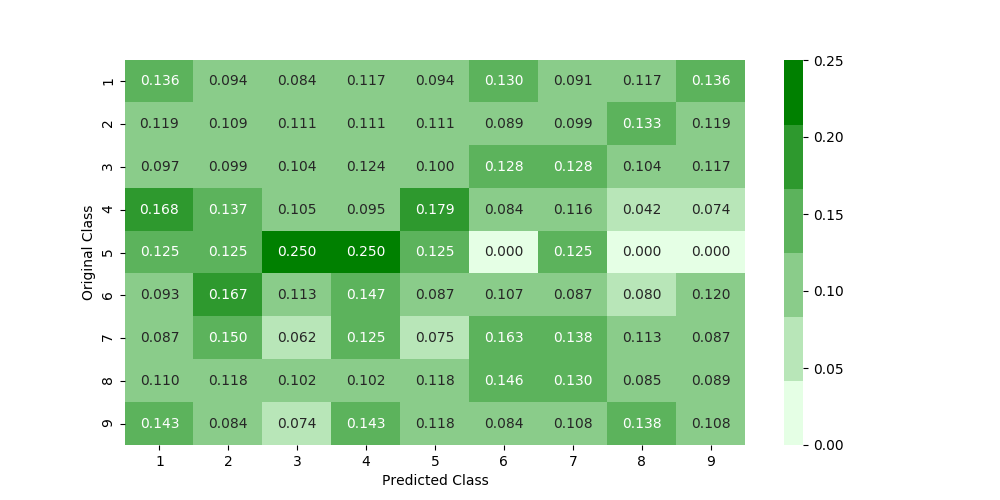

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 0.24777513781218283
log_loss for k =  3 is 0.23845548850941925
log_loss for k =  5 is 0.25537099638416066
log_loss for k =  7 is 0.2764720239314128
log_loss for k =  9 is 0.29224711058565467
log_loss for k =  11 is 0.30807939993101835
log_loss for k =  13 is 0.3209955583768579


<IPython.core.display.Javascript object>


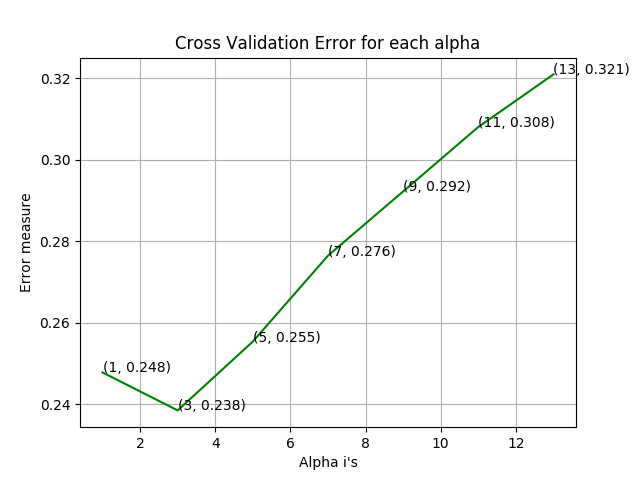

For values of best alpha =  3 The train log loss is: 0.12713978892381553
For values of best alpha =  3 The cross validation log loss is: 0.23845548850941925
For values of best alpha =  3 The test log loss is: 0.2291410961724346
Number of misclassified points  5.47378104875805
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


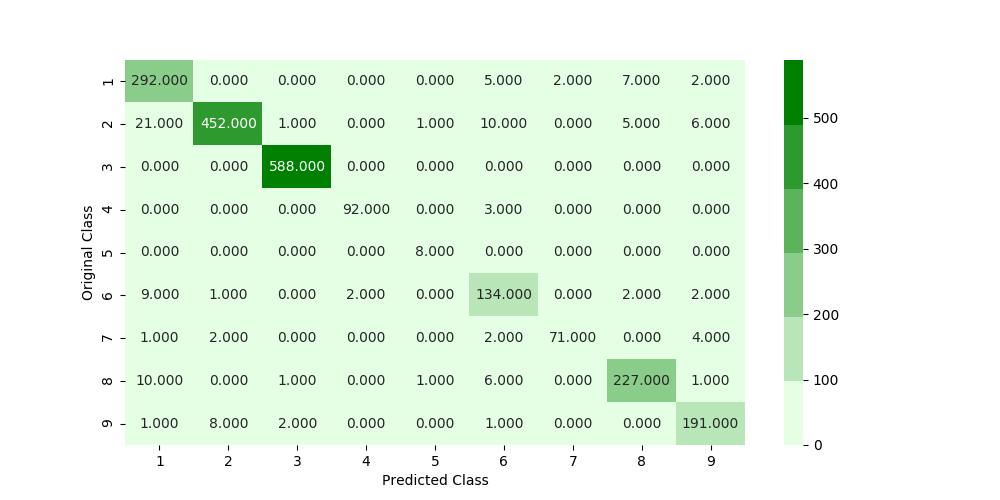

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


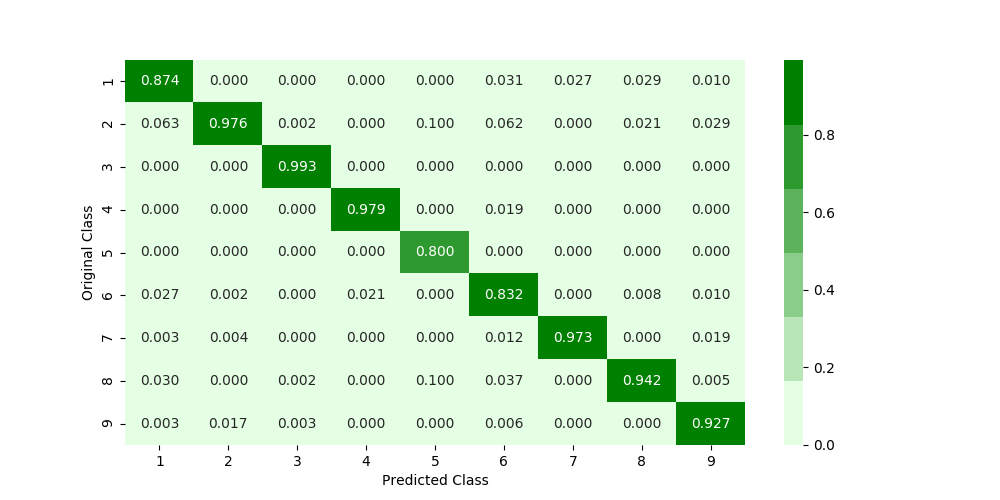

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


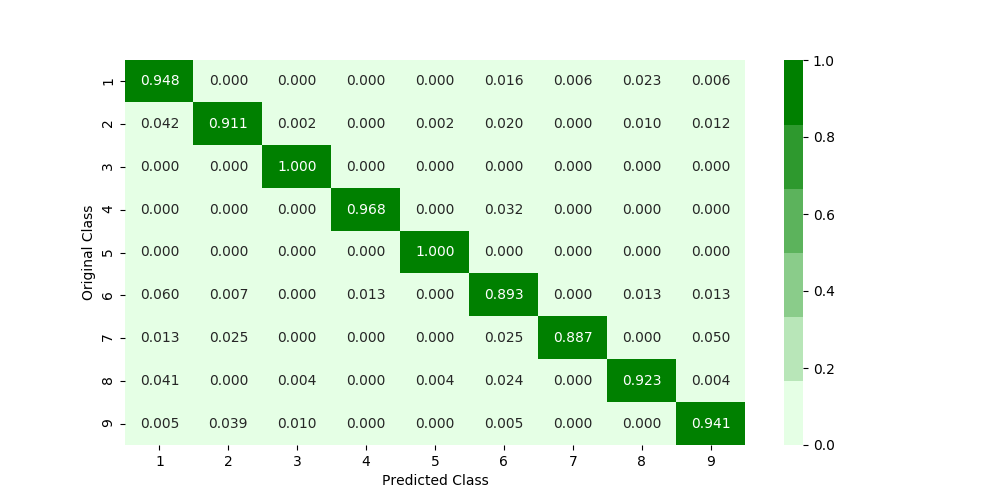

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>Logistic Regression</h3>

log_loss for c =  1e-05 is 1.5637106667856195
log_loss for c =  0.0001 is 1.5679732960571189
log_loss for c =  0.001 is 1.533896283957173
log_loss for c =  0.01 is 1.0122683584710674
log_loss for c =  0.1 is 0.8609745973480372
log_loss for c =  1 is 0.7133695692606372
log_loss for c =  10 is 0.577283572896527
log_loss for c =  100 is 0.535342380018148
log_loss for c =  1000 is 0.6294303174469098


<IPython.core.display.Javascript object>


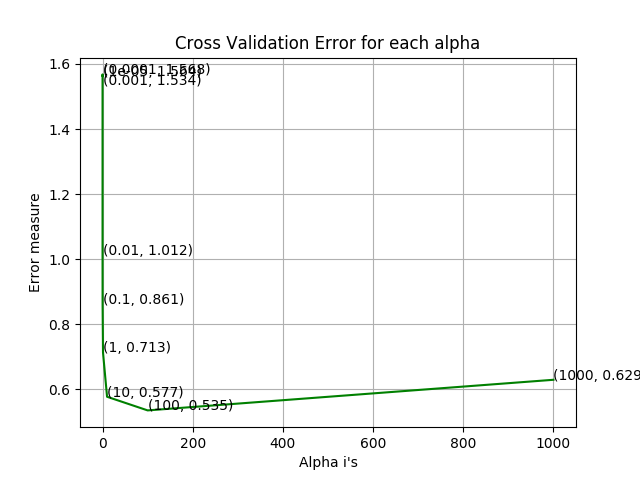

log loss for train data 0.4901171125525212
log loss for cv data 0.535342380018148
log loss for test data 0.5318133382588803
Number of misclassified points  11.729530818767248
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


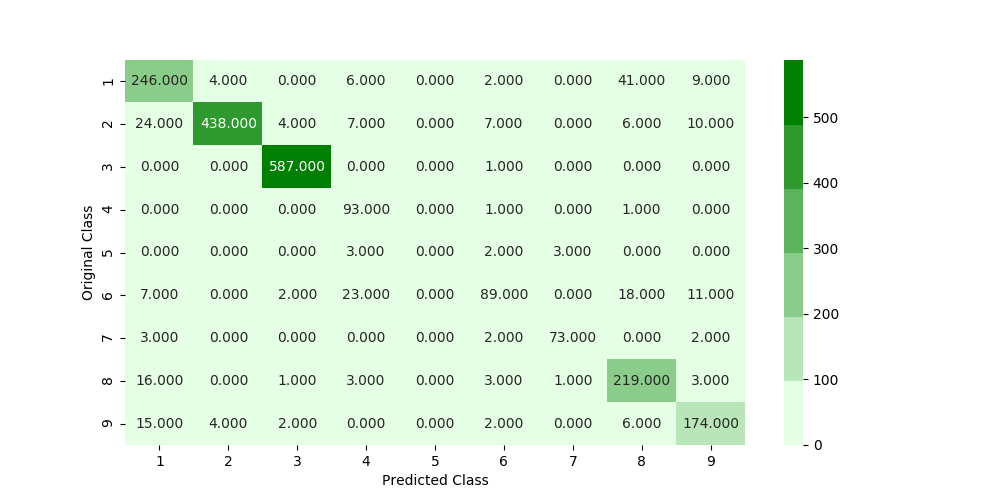

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


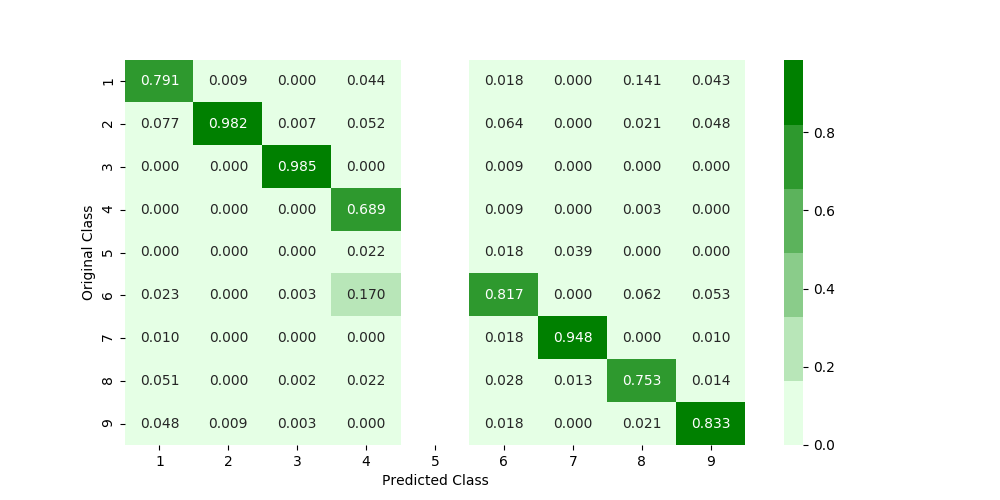

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


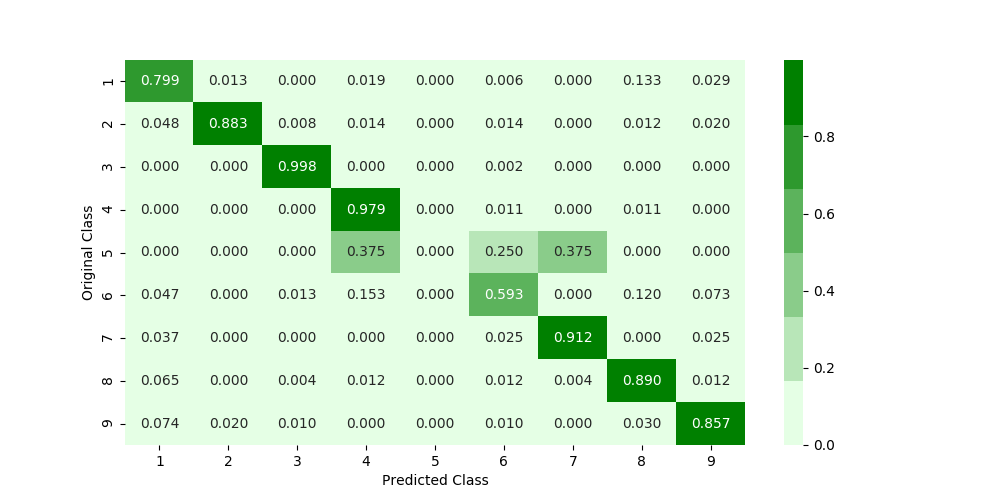

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>Random Forest Classifier </h3>

log_loss for c =  10 is 0.09242090395585201
log_loss for c =  50 is 0.0774743221446237
log_loss for c =  100 is 0.07804326654510159
log_loss for c =  500 is 0.07625940051715287
log_loss for c =  1000 is 0.07651447560078704
log_loss for c =  2000 is 0.07684867461391831
log_loss for c =  3000 is 0.07684724018887608


<IPython.core.display.Javascript object>


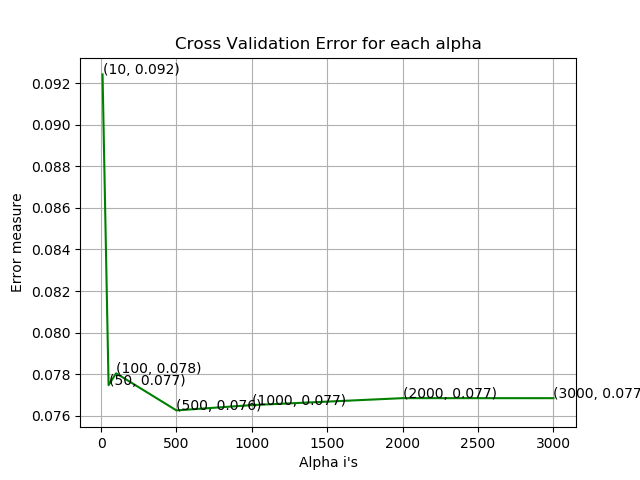

For values of best alpha =  500 The train log loss is: 0.029817189930658836
For values of best alpha =  500 The cross validation log loss is: 0.07625940051715287
For values of best alpha =  500 The test log loss is: 0.07038144774017985
Number of misclassified points  1.609935602575897
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


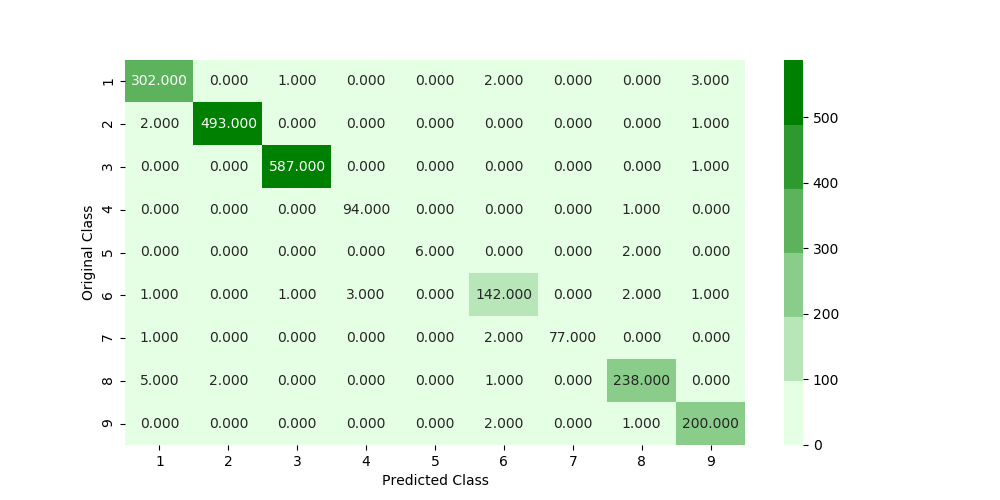

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


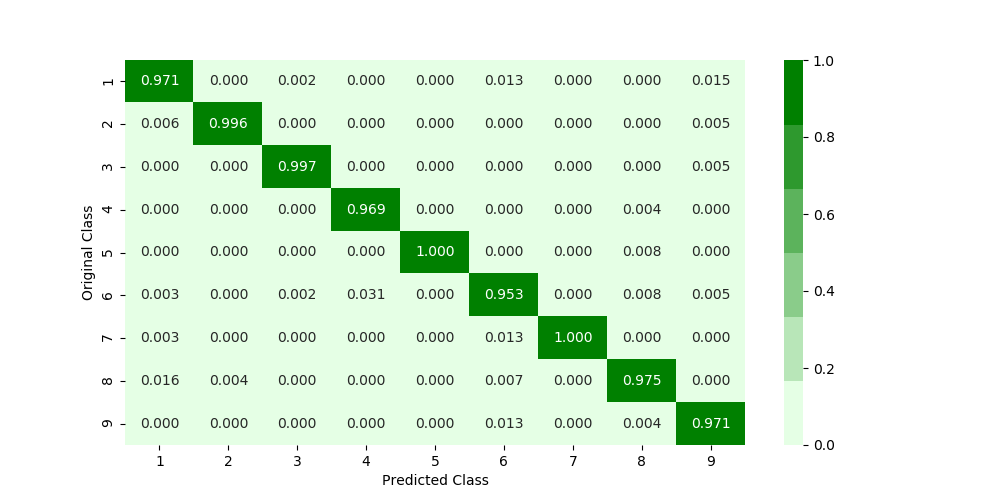

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


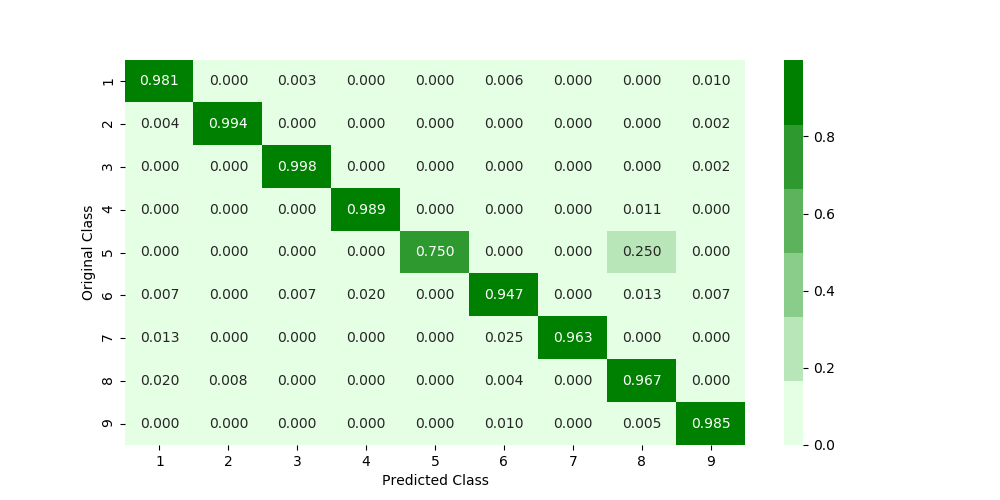

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [33]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

In [12]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

In [58]:
with open('result_asm.pkl', 'wb') as f:
    pickle.dump(result_asm, f)

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [59]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

   Class                    ID       size
0      2  0Hlm4XgE1cQhC6BkMays  86.737548
1      1  EhSAMWFg7Uk5oqBfNlcC   0.163097
2      1  1Rr0hWX8Qz6nm3IgYLuF   3.073788
3      3  5cXoH4pnaQFISUNl1DsR   0.156347
4      4  HuqJS8CAp24F1aWeLtIo   4.153453


In [60]:
with open('asm_size_byte.pkl', 'wb') as f:
    pickle.dump(asm_size_byte, f)

In [13]:
with open('asm_size_byte.pkl', 'rb') as f:
    asm_size_byte=pickle.load(f)

<h3>Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


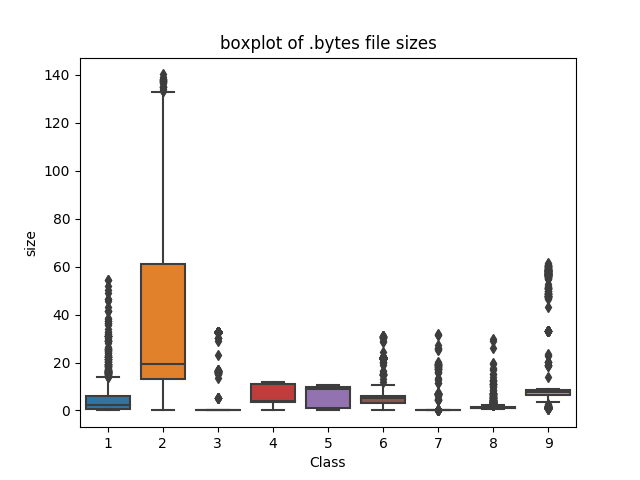

In [30]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [14]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [15]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

<h3>Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


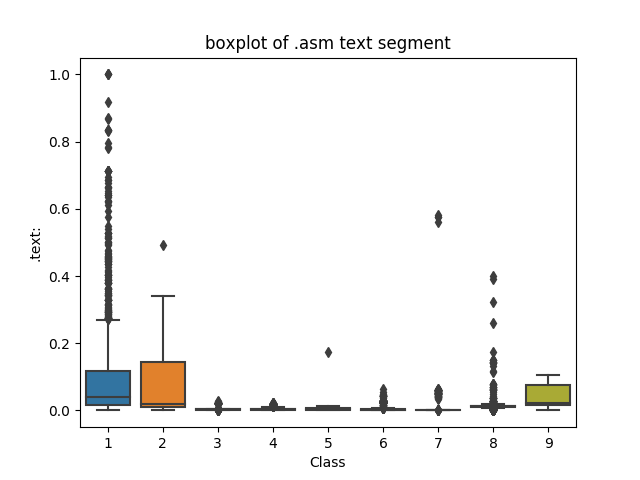

In [33]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


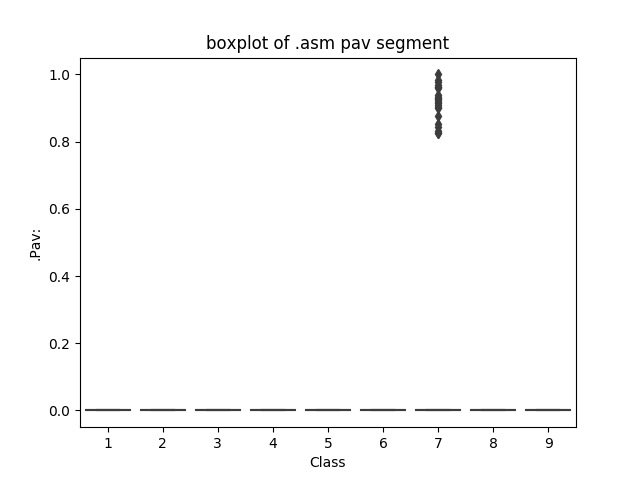

In [34]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


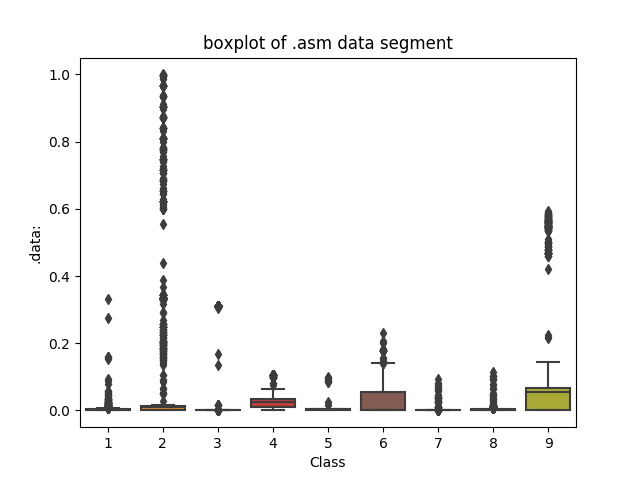

In [35]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


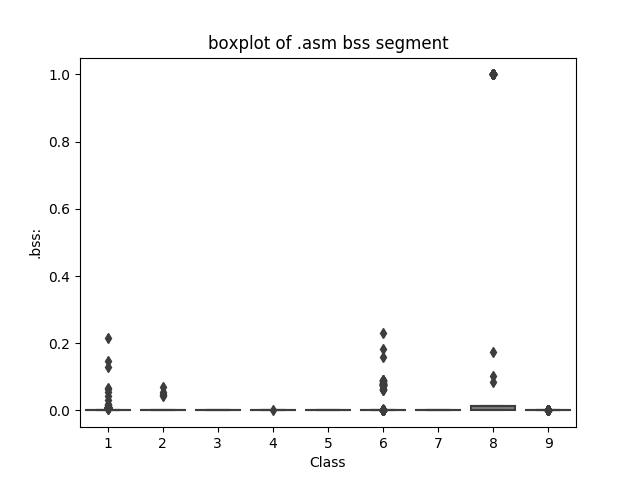

In [36]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


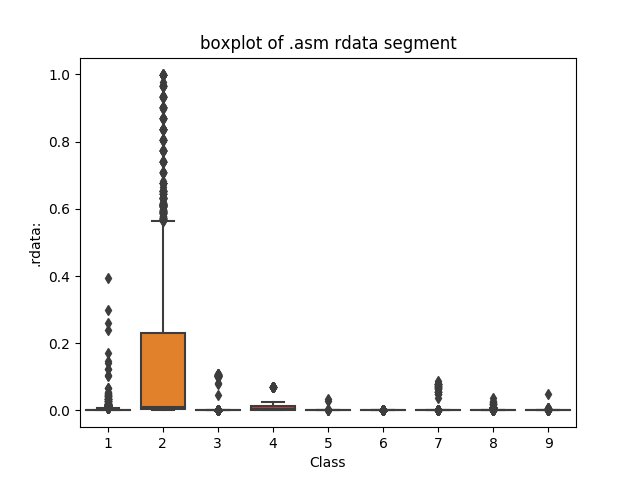

In [37]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


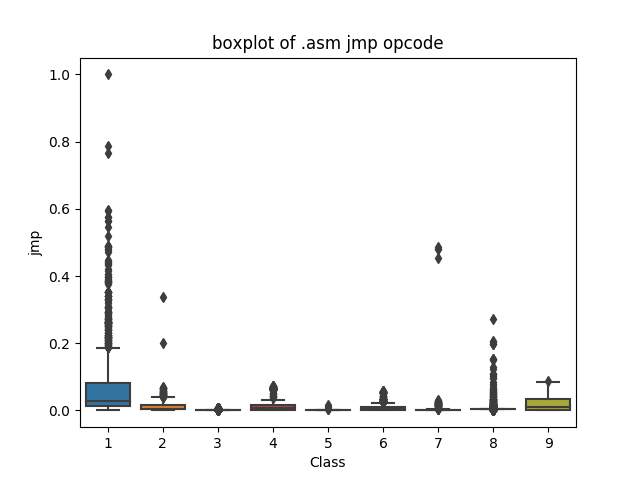

In [38]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


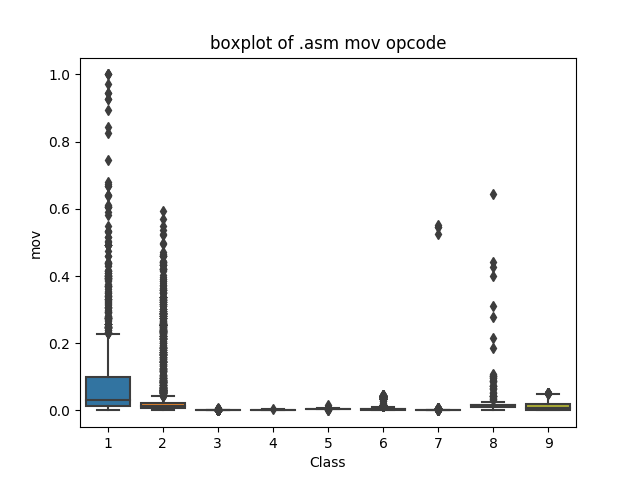

In [39]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


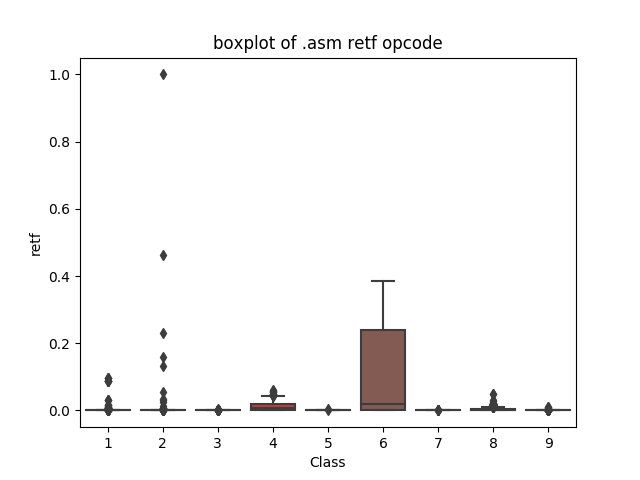

In [40]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


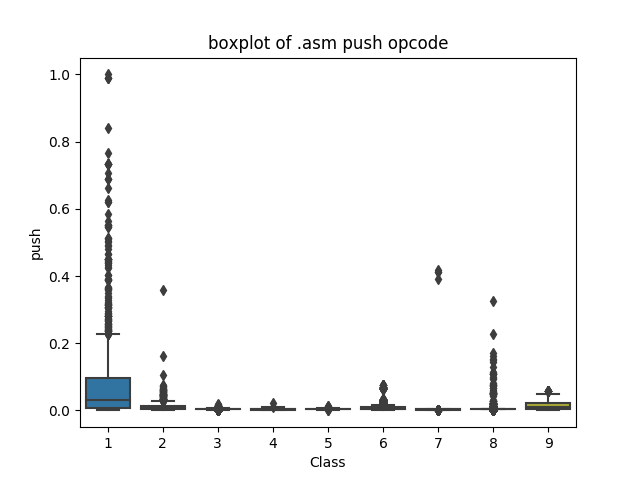

In [41]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3>Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


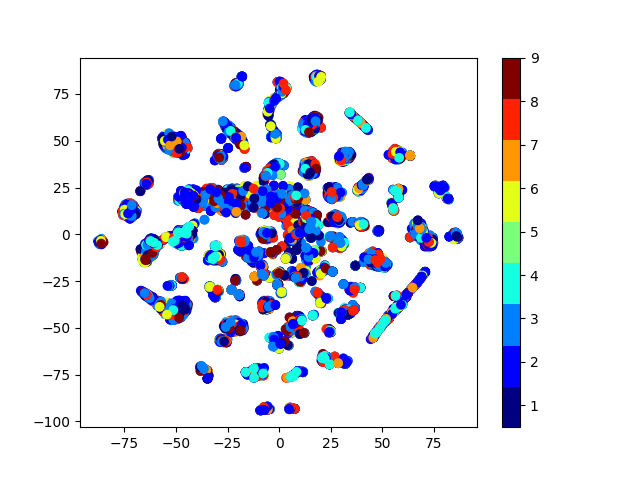

In [42]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

In [22]:
from datetime import datetime

<IPython.core.display.Javascript object>


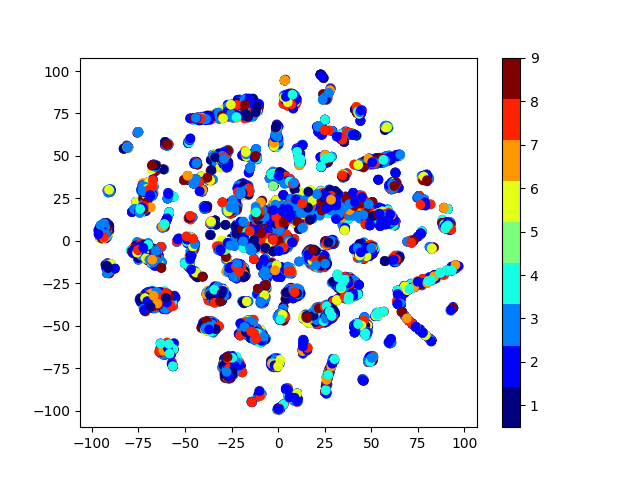

Time: 0:01:30.638416


In [47]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy
start = datetime.now()
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()
print("Time:",datetime.now()-start)

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> Train and test split</h2>

In [33]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [34]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [35]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2>Machine Learning models on features of .asm files</h2>

<h3>Random Forest Classifier</h3>

log_loss for c =  10 is 0.03203748781676343
log_loss for c =  50 is 0.029900640527236226
log_loss for c =  100 is 0.029166964804348085
log_loss for c =  500 is 0.027602098262230725
log_loss for c =  1000 is 0.027745826732898448
log_loss for c =  2000 is 0.027747180675987942
log_loss for c =  3000 is 0.027647503371764966


<IPython.core.display.Javascript object>


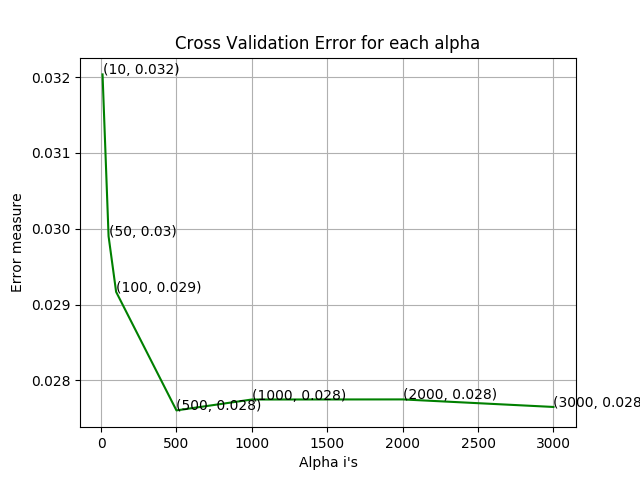

log loss for train data 0.014983035365192939
log loss for cv data 0.027602098262230725
log loss for test data 0.03428999385291668
Number of misclassified points  0.8279668813247469
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


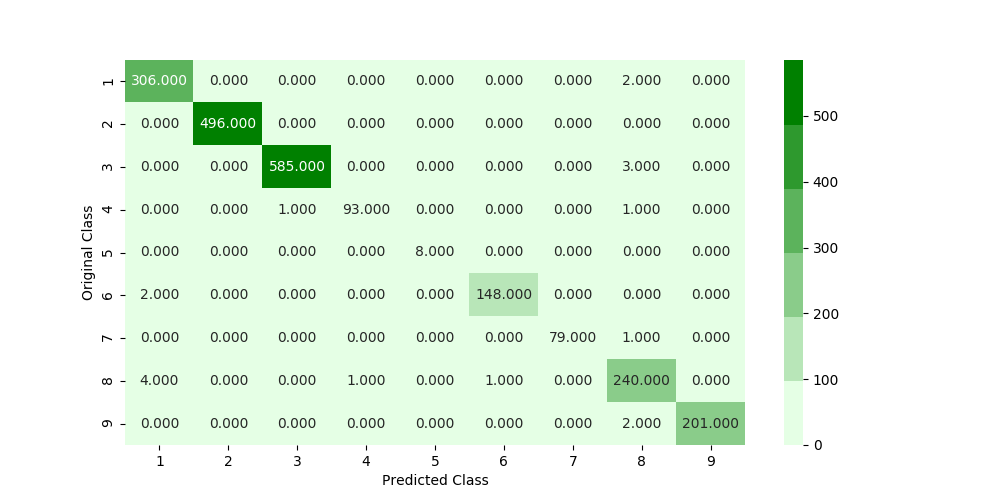

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


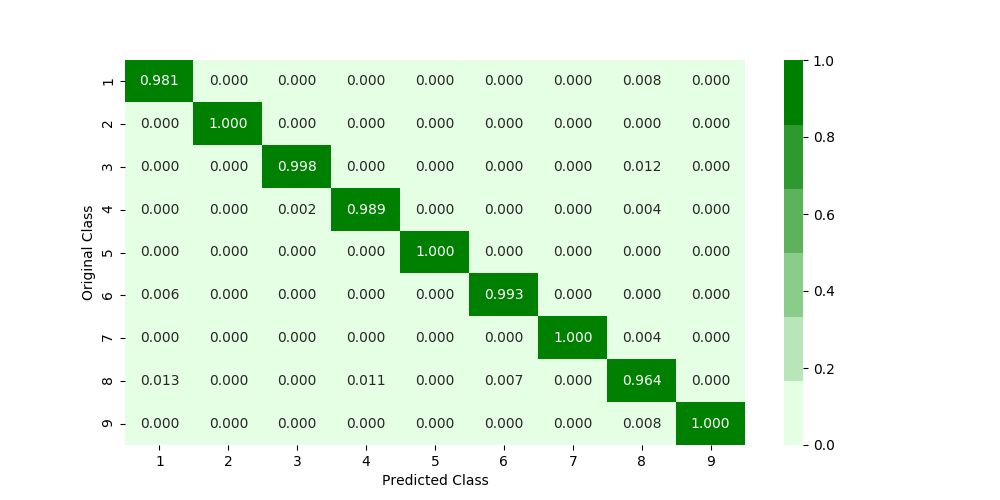

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


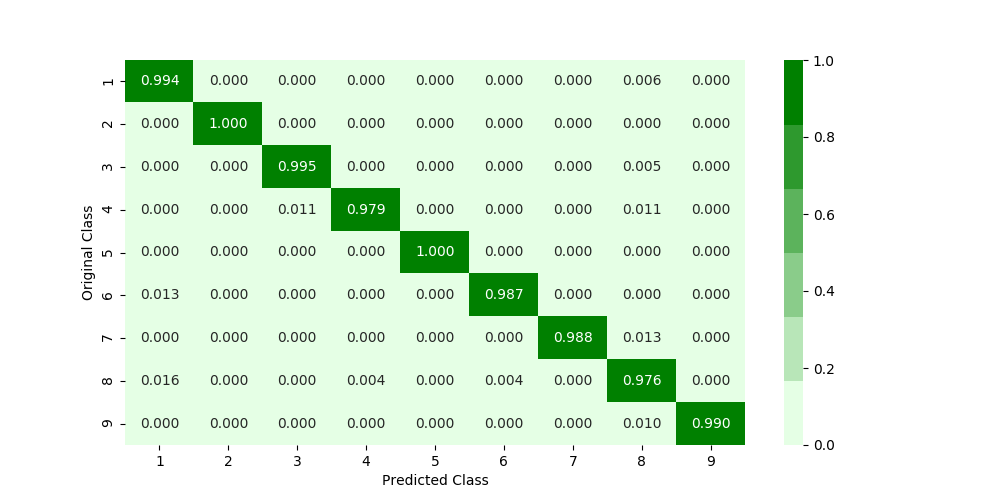

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
TIME: 0:02:12.644796


In [38]:
start=datetime.now()
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))
print('TIME:',datetime.now()-start)

<h3>XgBoost Classifier</h3>

log_loss for c =  10 is 0.13094573832405315
log_loss for c =  50 is 0.05724234265042303
log_loss for c =  100 is 0.03702235115125615
log_loss for c =  500 is 0.032752602577878535
log_loss for c =  1000 is 0.032298781264757194
log_loss for c =  2000 is 0.03171492744899096
log_loss for c =  3000 is 0.03144375949072486


<IPython.core.display.Javascript object>


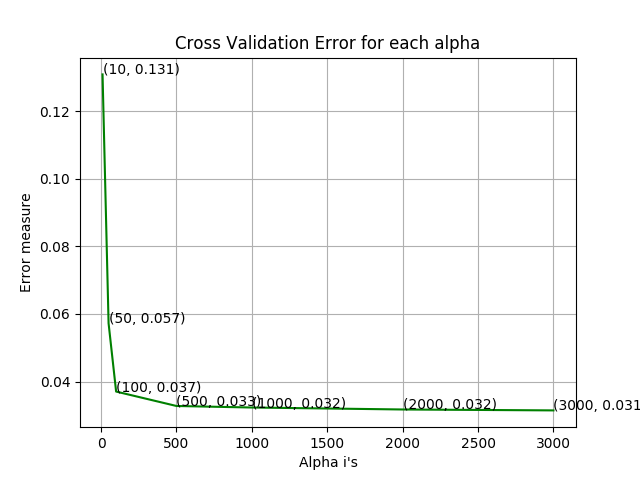

For values of best alpha =  3000 The train log loss is: 0.010685439584316267
For values of best alpha =  3000 The cross validation log loss is: 0.03144375949072486
For values of best alpha =  3000 The test log loss is: 0.04364420844862835
Number of misclassified points  0.6439742410303588
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


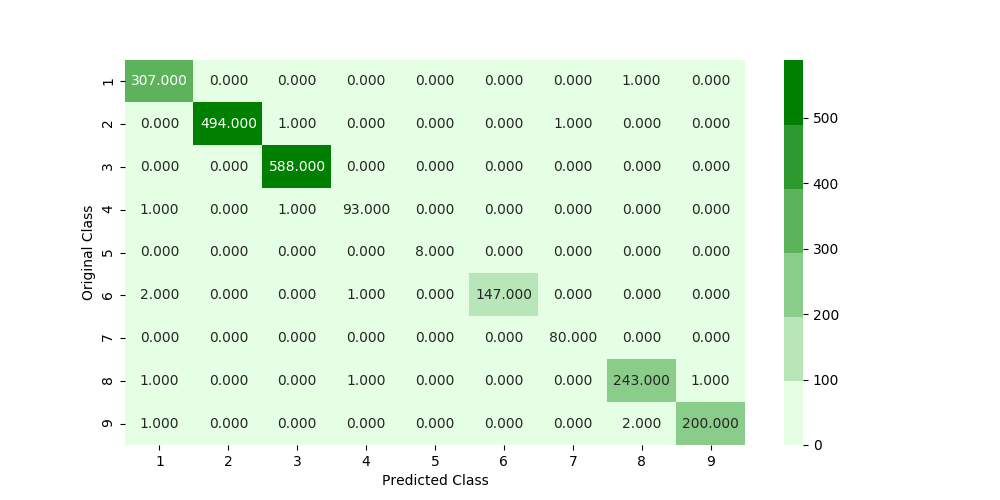

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


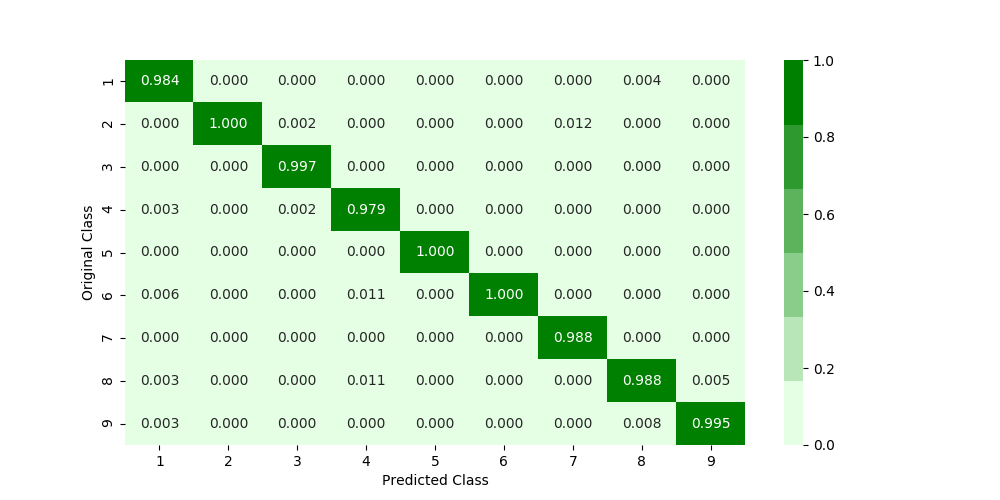

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


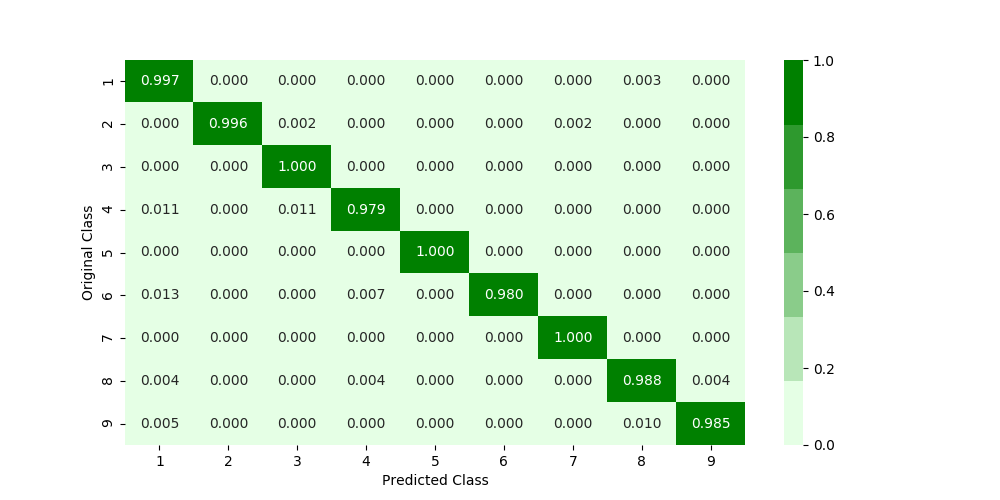

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
TIME: 0:06:21.568461


In [56]:
start=datetime.now()
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))
print('TIME:',datetime.now()-start)

<h3>Xgboost Classifier with best hyperparameters</h3>

In [57]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.2min remaining:   42.7s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.7min remaining:   30.9s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.7min remaining:   11.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [58]:
print (random_cfl.best_params_)

{'subsample': 0.3, 'max_depth': 10, 'colsample_bytree': 0.5, 'n_estimators': 200, 'learning_rate': 0.2}


In [59]:
x_cfl=XGBClassifier(n_estimators=200,subsample=0.5,learning_rate=0.15,colsample_bytree=0.5,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.01093235974225123
cv loss 0.029203267346096573
test loss 0.04257463574729791


<h3>Merging both asm and byte file features</h3>

In [31]:
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121236      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

In [32]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

In [88]:
print(result.shape)
print(result_asm.shape)

(10868, 260)
(10868, 54)


In [16]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...       edx       esi       eax       ebx  \
0  0.002946  0.002638  0.003531  ...  0.015418  0.025875  0.025744  0.004910   
1  0.006984  0.008267  0.000394  ...  0.004961  0.012316  0.007858  0.007570   
2  0.002155  0.008104  0.002707  ...  0.000095  0.006181  0.000100  0.003773   
3  0.000481  0.000959  0.000521  ...  0.000343  0.000746  0.000301  0.000360   
4  0.000229  0.000376  0.000246  ...  0.000343  0.013875  0.000482  0.012932   

        ecx  edi       ebp       esp       eip    size_y  
0  0.008930  0.0  0.027174  0.000428  0.049896  0.400910  
1  0.005350  0.0  0.043478  0.000673  0.024839  0.099719  
2  0.000713  0.0  0.048913  0.000000  0.012802  0.060553  
3  0.001057  0.0  0.030797  0.001468  0.003173  0.000432  
4  0.001363  0.0  0.027174  0.000000  0.008316  0.006983  

[5 rows x 307 columns]

<h3>Train and Test split</h3>

In [43]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3>Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.03959966800136618
log_loss for c =  50 is 0.03414860767989163
log_loss for c =  100 is 0.032483332298447264
log_loss for c =  500 is 0.03200827219488654
log_loss for c =  1000 is 0.03155424984041681
log_loss for c =  2000 is 0.031160375456034842
log_loss for c =  3000 is 0.031180931594978326


<IPython.core.display.Javascript object>


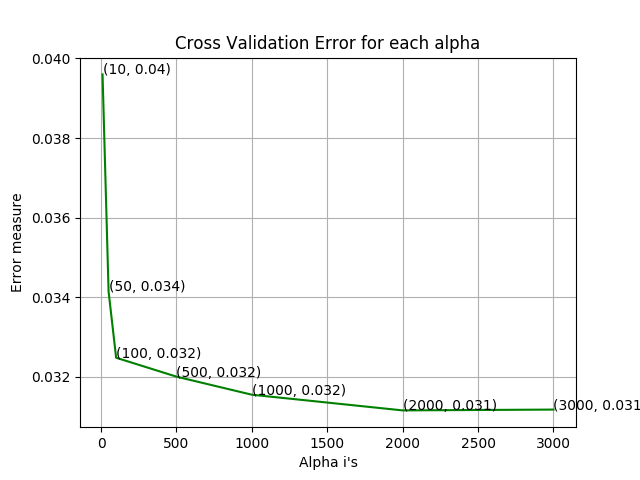

For values of best alpha =  2000 The train log loss is: 0.01539035284136093
For values of best alpha =  2000 The cross validation log loss is: 0.031160375456034842
For values of best alpha =  2000 The test log loss is: 0.037238904468450865


In [68]:
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

In [41]:
import pickle

In [48]:
with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

In [ ]:
with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)
    
with open('X_train.pkl', 'wb') as a:
    pickle.dump(y_train, a)

In [42]:
with open('X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

In [43]:
with open('y_train.pkl', 'rb') as a:
    y_train = pickle.load(a)
    
with open('X_train_merge.pkl','rb') as b:
    X_train_merge = pickle.load(b)
    
with open('y_train_merge.pkl', 'rb') as c:
    y_train_merge = pickle.load(c)
    
with open('y_cv_merge.pkl', 'rb') as d:
    y_cv_merge = pickle.load(d)
    
with open('y_test_merge.pkl', 'rb') as e:
    y_test_merge = pickle.load(e)
    
with open('X_test_merge.pkl', 'rb') as g:
    X_test_merge = pickle.load(g)
    
with open('X_cv_merge.pkl', 'rb') as h:
    X_cv_merge = pickle.load(h)

<h3>XgBoost Classifier on final features</h3>

log_loss for c =  10 is 0.06991882993519845
log_loss for c =  50 is 0.0372840665691617
log_loss for c =  100 is 0.03052409000243818
log_loss for c =  500 is 0.02695401402348596
log_loss for c =  1000 is 0.026581832983199397
log_loss for c =  2000 is 0.026420580166581307
log_loss for c =  3000 is 0.02643446091767957


<IPython.core.display.Javascript object>


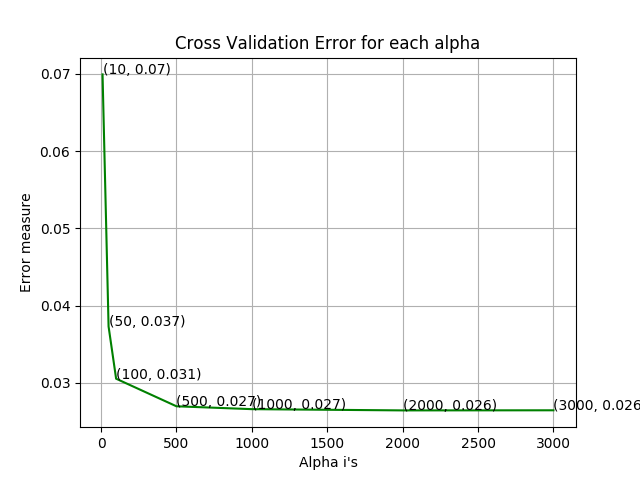

For values of best alpha =  2000 The train log loss is: 0.011646788210314955
For values of best alpha =  2000 The cross validation log loss is: 0.02643446091767957
For values of best alpha =  2000 The test log loss is: 0.027922392810501524
TIME: -1 day, 23:28:42.531629


In [45]:
start=datetime.now()
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
print('TIME:',start-datetime.now())

<h3>XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [9]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 11.9min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 12.4min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 13.4min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.5min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [10]:
print (random_cfl.best_params_)

{'learning_rate': 0.2, 'subsample': 1, 'max_depth': 5, 'n_estimators': 2000, 'colsample_bytree': 0.3}


In [29]:
alpha=[10,50,100,500,1000,2000,3000]
best_alpha=2

In [34]:
start=datetime.now()
x_cfl=XGBClassifier(n_estimators=1000,max_depth=10,learning_rate=0.15,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
#plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))
print('TIME:',datetime.now()-start)

For values of best alpha =  100 The train log loss is: 0.011579947343119538
For values of best alpha =  100 The cross validation log loss is: 0.031010552415487728
For values of best alpha =  100 The test log loss is: 0.030931967658731584
TIME: 0:08:55.691171


<h1>Assignments </h1>

<ol>
<li> Add bi-grams and n-gram features on byte files and improve the log-loss</li>
<li> Using the 'dchad' github account (https://github.com/dchad/malware-detection), decrease the logloss to <=0.01 </li>
<li> Watch the video ( https://www.youtube.com/watch?v=VLQTRlLGz5Y ) that was in reference section and implement the image features to improve the logloss </li>
</ol>

# TASK 1:- n-gram features on byte files

In [116]:
byte_vocab = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"


In [117]:
byte_bigram_vocab = []
def byte_bigram():    
    for i, v in enumerate(byte_vocab.split(',')):
        for j in range(0, len(byte_vocab.split(','))):
            byte_bigram_vocab.append(v + ' ' +byte_vocab.split(',')[j])
    return len(byte_bigram_vocab)

In [118]:
byte_bigram()

66049

In [17]:
byte_bigram_vocab[:5]

['00 00', '00 01', '00 02', '00 03', '00 04']

In [47]:
byte_trigram_vocab = []
def byte_trigram():
    for i, v in enumerate(byte_vocab.split(',')):
        for j in range(0, len(byte_vocab.split(','))):
            for k in range(0, len(byte_vocab.split(','))):
                byte_trigram_vocab.append(v + ' ' +byte_vocab.split(',')[j]+' '+byte_vocab.split(',')[k])
    return len(byte_trigram_vocab)

In [49]:
# byte_trigram()

In [28]:
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer
import scipy

In [21]:
a=[]
vector = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=byte_bigram_vocab)
bytebigram_vect = scipy.sparse.csr_matrix((10868, 66049))
for i, file in tqdm(enumerate(os.listdir('byteFiles'))):
    f = open('byteFiles/' + file)
    a[i:]+= scipy.sparse.csr_matrix(vector.fit_transform([f.read().replace('\n', ' ').lower()]))
    f.close()

10868it [3:31:35,  1.17s/it]


In [23]:
byte_bigram_vect = normalize(bytebigram_vect, axis = 0)

In [ ]:
with open('byte_bigram_vect.pkl','wb') as f:
    pickle.dump(byte_bigram_vect, f)

In [114]:
with open('byte_bigram_vect.pkl','rb') as f:
    byte_bigram_vect = pickle.load(f)

# Task 2&3 :-    
## i) N-gram OPCODE

In [53]:
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

In [40]:
Asmopcodebigram = []
def asmopcodebigram():
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            Asmopcodebigram.append(v + ' ' + opcodes[j])
    print(len(Asmopcodebigram))

In [41]:
asmopcodebigram()

676


In [ ]:
with open('asmopcodebigram.pkl','wb') as f:
    pickle.dump(asmopcodebigram, f)

In [ ]:
with open('asmopcodebigram.pkl','rb') as g:
    asmopcodebigram=pickle.load(g)

In [54]:
Asmopcodetrigram = []
def asmopcodetrigram():
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            for k in range(0, len(opcodes)):
                Asmopcodetrigram.append(v + ' ' + opcodes[j] + ' ' + opcodes[k])
    print(len(Asmopcodetrigram))

In [55]:
asmopcodetrigram()

17576


In [15]:
with open('asmopcodetrigram.pkl','wb') as f:
    pickle.dump(asmopcodetrigram, f)

In [16]:
with open('asmopcodetrigram.pkl','rb') as f:
    asmopcodetrigram=pickle.load(f)

In [56]:
Asmopcodetetragram = []
def asmopcodetetragram():
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            for k in range(0, len(opcodes)):
                for l in range(0, len(opcodes)):
                    Asmopcodetetragram.append(v + ' ' + opcodes[j] + ' ' + opcodes[k] + ' ' + opcodes[l])
    print(len(Asmopcodetetragram))

In [57]:
asmopcodetetragram()

456976


In [23]:
with open('asmopcodetetragram.pkl','wb') as f:
    pickle.dump(asmopcodetetragram, f)

In [ ]:
def opcode_collect():
    op_file = open("opcode_file.txt", "w+")
    for asmfile in os.listdir('asmFiles'):
        opcode_str = ""
        with codecs.open('asmFiles/' + asmfile, encoding='cp1252', errors ='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()            
                for li in line:
                    if li in opcodes:
                        opcode_str += li + ' '
        op_file.write(opcode_str + "\n")
    op_file.close()
opcode_collect()

In [46]:
start=datetime.now()
vect = CountVectorizer(ngram_range=(2, 2), vocabulary = Asmopcodebigram)
opcodebivect = scipy.sparse.csr_matrix((10868, len(Asmopcodebigram)))
raw_opcode = open('opcode_file.txt').read().split('\n')

for indx in range(9249):
    opcodebivect[indx, :] += scipy.sparse.csr_matrix(vect.transform([raw_opcode[indx]]))
print("TIME:",datetime.now()-start)

TIME: 0:03:14.256246


In [92]:
opcodebivect

<10868x676 sparse matrix of type '<class 'numpy.float64'>'
	with 1602969 stored elements in Compressed Sparse Row format>

In [58]:
vect = CountVectorizer(ngram_range=(3, 3), vocabulary = Asmopcodetrigram)
opcodetrivect = scipy.sparse.csr_matrix((10868, len(Asmopcodetrigram)))

for indx in range(9249):
    opcodetrivect[indx, :] += scipy.sparse.csr_matrix(vect.transform([raw_opcode[indx]]))

In [59]:
opcodetrivect

<10868x17576 sparse matrix of type '<class 'numpy.float64'>'
	with 6280065 stored elements in Compressed Sparse Row format>

In [61]:
start=datetime.now()
vect = CountVectorizer(ngram_range=(4, 4), vocabulary = Asmopcodetetragram)
opcodetetravect = scipy.sparse.csr_matrix((10868, len(Asmopcodetetragram)))

for indx in range(9249):
    opcodetetravect[indx, :] += scipy.sparse.csr_matrix(vect.transform([raw_opcode[indx]]))
print("TIME:",datetime.now()-start)

TIME: 0:20:17.778120


In [62]:
opcodetetravect

<10868x456976 sparse matrix of type '<class 'numpy.float64'>'
	with 14243264 stored elements in Compressed Sparse Row format>

## ii) IMAGE FEATURES

In [72]:
import array
import imageio
import glob
dest_dir='asm_image/'
def collect_img_asm():
    for asmfile in os.listdir("asmFiles"):
        if glob.glob(dest_dir+asmfile.split('.')[0]+'*'):
            continue
        else:
            filename = asmfile.split('.')[0]
            file = codecs.open("asmFiles/" + asmfile, 'rb')
            filelen = os.path.getsize("asmFiles/" + asmfile)
            width = int(filelen ** 0.5)
            rem = int(filelen / width)
            arr = array.array('B')
            arr.frombytes(file.read())
            file.close()
            reshaped = np.reshape(arr[:width * width], (width, width))
            reshaped = np.uint8(reshaped)
            #scipy.misc.imsave('asm_image/' + filename + '.png',reshaped)
            imageio.imwrite('asm_image/' + filename + '.png', reshaped)

In [73]:
collect_img_asm()

In [7]:
import cv2
imagefeatures = np.zeros((10868, 200))

In [8]:
start=datetime.now()
ctr=0
for i, asmfile in enumerate(os.listdir("asmFiles")):
    img = cv2.imread("asm_image/" + asmfile.split('.')[0] + '.png')
    ctr+=1
    print(str(asmfile))
    img_arr = img.flatten()[:200]
    imagefeatures[i, :] += img_arr
print(ctr)
print("TIME:",datetime.now()-start)

0Hlm4XgE1cQhC6BkMays.asm
EhSAMWFg7Uk5oqBfNlcC.asm
1Rr0hWX8Qz6nm3IgYLuF.asm
5cXoH4pnaQFISUNl1DsR.asm
HuqJS8CAp24F1aWeLtIo.asm
47cdjy1YmUt5nwesX0qS.asm
eG1bTK5AB7Mryunti3mO.asm
dbpHcR9jZeurykDsAnMT.asm
CrKgOTJ6MutNvsD1E0jB.asm
J8pdGbHyWis9ToawOIMA.asm
4KOceFJiZ30X7NtS9IL1.asm
2VHnal41dt9Ar0EhQSjZ.asm
aCmnVPKkA4vrdoyHS6uB.asm
IT8nb7MvO5QZptGjNasH.asm
BmAsMFYUjKf8kngDbloW.asm
I5v28ycbZiHdqzKXDxMJ.asm
aNBpfsEkzr29eQC5HKUd.asm
HjgSxn8pJ2ITBsmohaLr.asm
7OKTq3zbJBHh4FCs1LoX.asm
fOV9M2CJpEwILlGYFqi6.asm
CnBE8f9tH12lyUeQVR74.asm
cgZEp2RhI0eKqPXuYnxw.asm
0fvnGU7dkbr8iEhZuMcP.asm
E5SkPYDzxpyMwtXTWZ8a.asm
g32G8fcexHD0Cn76tzwJ.asm
E8YKtDkh0O4AxmGayQ1c.asm
5QkW049HFsDAiwCgKM2c.asm
GKHQIcajdxPpbu8ltEvJ.asm
IuPbVhUqrzvp2oTKMsDg.asm
JLGnIyg7olZ9MpdN8wmj.asm
3Vhmj45EaPbB60rXoIMw.asm
Dw3LWkzUOlqIKxGphv1c.asm
9dOVJRHAPot6sCl8pNMI.asm
90bDVByGTFolh5XW1JiU.asm
BV4EjiKZJ1ekaoYxz7D0.asm
IR2aS8pG4mbN59ZjCixk.asm
02JqQ7H3yEoD8viYWlmS.asm
0fxgjYEClPL1BDbcshzJ.asm
cuNE2eL7XtkbJQw50zsW.asm
HUm67uRSKYPFd1IBDjpM.asm


In [69]:
from sklearn.preprocessing import normalize

In [12]:
imgfeatures_name = []
for i in range(200):
    imgfeatures_name.append('pix' + str(i))
imgdf = pd.DataFrame(normalize(imagefeatures, axis = 0), columns = imgfeatures_name)

In [13]:
imgdf.head()

pix0      pix1      pix2      pix3      pix4      pix5      pix6  \
0  0.006561  0.006561  0.006561  0.013505  0.013505  0.013505  0.012928   
1  0.010269  0.010269  0.010269  0.008033  0.008033  0.008033  0.008320   
2  0.010269  0.010269  0.010269  0.008033  0.008033  0.008033  0.008320   
3  0.010269  0.010269  0.010269  0.008033  0.008033  0.008033  0.008320   
4  0.010269  0.010269  0.010269  0.008033  0.008033  0.008033  0.008320   

       pix7      pix8      pix9  ...    pix190    pix191    pix192    pix193  \
0  0.012928  0.012928  0.013964  ...  0.009594  0.009594  0.009594  0.009594   
1  0.008320  0.008320  0.007913  ...  0.009594  0.009594  0.009594  0.009594   
2  0.008320  0.008320  0.007913  ...  0.009594  0.009594  0.009594  0.009594   
3  0.008320  0.008320  0.007913  ...  0.009594  0.009594  0.009594  0.009594   
4  0.008320  0.008320  0.007913  ...  0.009594  0.009594  0.009594  0.009594   

     pix194    pix195    pix196    pix197    pix198    pix199  
0  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594  
1  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594  
2  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594  
3  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594  
4  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594  

[5 rows x 200 columns]

In [ ]:
with open('imgdf.pkl','wb') as f:
    pickle.dump(imgdf, f)

In [66]:
with open('imgdf.pkl', 'rb') as a:
    imgdf = pickle.load(a)

In [84]:
def imp_features(data, features, keep):
    rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    rf.fit(data, result_y)
    imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
    imp_value = np.take(rf.feature_importances_, imp_feature_indx[:20])
    imp_feature_name = np.take(features, imp_feature_indx[:20])
    sns.set()
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(x = imp_feature_name, y = imp_value)
    ax.set_xticklabels(labels = imp_feature_name, rotation = 45)
    sns.set_palette(reversed(sns.color_palette("husl", 10)), 10)
    plt.title('Important Features')
    plt.xlabel('Feature Names')
    plt.ylabel('Importance')
    return imp_feature_indx[:keep]

In [96]:
op_bi_indxes = imp_features(normalize(opcodebivect, axis = 0), Asmopcodebigram, 200)

In [97]:
op_bi_df = pd.SparseDataFrame(normalize(opcodebivect, axis = 0), columns = Asmopcodebigram)
for col in op_bi_df.columns:
    if col not in np.take(Asmopcodebigram, op_bi_indxes):
        op_bi_df.drop(col, axis = 1, inplace = True)

In [98]:
op_bi_df.to_dense().to_csv('op_bi.csv')

In [99]:
op_bi_df = pd.read_csv('op_bi.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [100]:
op_bi_df['ID'] = result.ID
op_bi_df.head()

jmp jmp   jmp mov  jmp push   jmp pop   jmp xor  jmp retn   jmp add  \
0  0.000000  0.000255  0.000224  0.000000  0.000443  0.000768  0.000000   
1  0.000000  0.000234  0.000448  0.000000  0.000148  0.000000  0.000000   
2  0.009819  0.016601  0.006719  0.003173  0.005464  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.005611  0.000106  0.000373  0.001983  0.000148  0.002304  0.000529   

    jmp cmp  jmp call   jmp lea  ...   lea sub   lea add    lea or   lea cmp  \
0  0.001666  0.000607  0.000000  ...  0.001931  0.000575  0.001167  0.000762   
1  0.000476  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.014641  0.016395  0.003461  ...  0.006179  0.001726  0.000000  0.001016   
3  0.000000  0.000000  0.000000  ...  0.000772  0.000575  0.001167  0.001777   
4  0.000476  0.000304  0.000000  ...  0.000000  0.000288  0.000000  0.000000   

   lea call  lea jz   lea lea  movzx mov  movzx sub                    ID  
0  0.000071     0.0  0.000252   0.000949   0.000513  01azqd4InC7m9JpocGv5  
1  0.000000     0.0  0.000126   0.000000   0.000000  01IsoiSMh5gxyDYTl4CB  
2  0.005919     0.0  0.001260   0.005458   0.000000  01jsnpXSAlgw6aPeDxrU  
3  0.000107     0.0  0.000000   0.000000   0.000000  01kcPWA9K2BOxQeS5Rju  
4  0.000000     0.0  0.000000   0.000000   0.000000  01SuzwMJEIXsK7A8dQbl  

[5 rows x 201 columns]

## Extracting imp features:- opcode 3gram

In [101]:
op_tri_indxes = imp_features(normalize(opcodetrivect, axis = 0), Asmopcodetrigram, 200)

In [102]:
op_tri_df = pd.SparseDataFrame(normalize(opcodetrivect, axis = 0), columns = Asmopcodetrigram)
op_tri_df = op_tri_df.loc[:, np.intersect1d(op_tri_df.columns, np.take(Asmopcodetrigram, op_tri_indxes))]

In [103]:
op_tri_df.to_dense().to_csv('op_tri.csv')

In [104]:
op_tri_df = pd.read_csv('op_tri.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [105]:
op_tri_df['ID'] = result.ID
op_tri_df.head()

add add add  add add cmp  add add jmp  add add pop  add add sub  \
0     0.000101     0.000000     0.000000     0.000000     0.000000   
1     0.000101     0.000891     0.000000     0.000000     0.000000   
2     0.000000     0.002673     0.010885     0.000000     0.000000   
3     0.000000     0.000000     0.000000     0.000000     0.000684   
4     0.000101     0.000000     0.005443     0.002053     0.000000   

   add cmp mov  add cmp push  add jmp push  add lea push  add mov mov  ...  \
0     0.000000      0.000000      0.000000      0.000000     0.000520  ...   
1     0.000000      0.002256      0.000000      0.000000     0.000173  ...   
2     0.012092      0.006767      0.006518      0.002062     0.016019  ...   
3     0.000000      0.000000      0.000000      0.000000     0.000000  ...   
4     0.000000      0.000000      0.000931      0.000000     0.000000  ...   

   xchg mov pop  xor cmp jz  xor lea push  xor mov mov  xor mov push  \
0      0.000000    0.000975      0.003679     0.000167      0.000623   
1      0.000000    0.000000      0.001840     0.000111      0.000311   
2      0.000000    0.000975      0.000000     0.003778      0.003113   
3      0.013183    0.000000      0.001840     0.000000      0.000000   
4      0.000000    0.000000      0.000000     0.000000      0.000000   

   xor push call  xor push mov  xor push push  xor xor push  \
0       0.000000      0.000000       0.000475      0.000000   
1       0.000000      0.000000       0.000000      0.002111   
2       0.002313      0.001818       0.001898      0.080211   
3       0.002313      0.000000       0.000712      0.000000   
4       0.000000      0.000000       0.000237      0.000000   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 201 columns]

## Extracting important features:- opcode 4gram

In [107]:
op_tetra_indxes = imp_features(normalize(opcodetetravect, axis = 0), Asmopcodetetragram, 200)

In [108]:
op_tetra_df = pd.SparseDataFrame(normalize(opcodetetravect, axis = 0), columns = Asmopcodetetragram)
op_tetra_df = op_tetra_df.loc[:, np.intersect1d(op_tetra_df.columns, np.take(Asmopcodetetragram, op_tetra_indxes))]

In [109]:
op_tetra_df.to_dense().to_csv('op_tetra.csv')

In [110]:
op_tetra_df = pd.read_csv('op_tetra.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [111]:
op_tetra_df['ID'] = result.ID
op_tetra_df.head()

add add jmp push  add mov push call  add pop add pop  add pop call add  \
0               0.0           0.000000              0.0          0.000000   
1               0.0           0.000000              0.0          0.000000   
2               0.0           0.008954              0.0          0.000000   
3               0.0           0.000000              0.0          0.025901   
4               0.0           0.000000              0.0          0.000000   

   add pop lea push  add pop mov mov  add pop mov push  add pop push call  \
0          0.000000         0.000000          0.000000           0.000000   
1          0.000000         0.000000          0.000000           0.000000   
2          0.000000         0.007488          0.000000           0.000000   
3          0.024895         0.003744          0.015489           0.019329   
4          0.000000         0.000000          0.002582           0.000000   

   add pop push lea  add pop push mov  ...  sub mov sub push  \
0          0.000000          0.000000  ...          0.000000   
1          0.000000          0.000000  ...          0.000000   
2          0.000000          0.000000  ...          0.015423   
3          0.016978          0.014244  ...          0.000000   
4          0.000000          0.000000  ...          0.000000   

   sub mov xor push  sub push mov push  sub push push call  \
0          0.000000           0.000000            0.000000   
1          0.000000           0.000000            0.002409   
2          0.004468           0.001635            0.000000   
3          0.002234           0.000000            0.000000   
4          0.000000           0.000000            0.000000   

   sub push push push  xor mov push call  xor push mov push  \
0            0.000343                0.0           0.000000   
1            0.000343                0.0           0.000000   
2            0.007212                0.0           0.006963   
3            0.000343                0.0           0.000000   
4            0.000000                0.0           0.000000   

   xor push push call  xor push push push                    ID  
0            0.000000            0.000542  01azqd4InC7m9JpocGv5  
1            0.000000            0.000000  01IsoiSMh5gxyDYTl4CB  
2            0.000000            0.002168  01jsnpXSAlgw6aPeDxrU  
3            0.002118            0.000542  01kcPWA9K2BOxQeS5Rju  
4            0.002118            0.000000  01SuzwMJEIXsK7A8dQbl  

[5 rows x 201 columns]

## Extracting important features:- Byte bi-gram

In [119]:
byte_bi_indxes = imp_features(normalize(byte_bigram_vect, axis = 0), byte_bigram_vocab, 300)

In [121]:
top_byte_bi = np.zeros((10868, 0))
for i in byte_bi_indxes:
    sliced = byte_bigram_vect[:, i].todense()
    top_byte_bi = np.hstack([top_byte_bi, sliced])

In [123]:
top_byte_bi = np.zeros((10868, 0))
for i in byte_bi_indxes:
    sliced = byte_bigram_vect[:, i].todense()
    top_byte_bi = np.hstack([top_byte_bi, sliced])

In [124]:
byte_bi_df = pd.SparseDataFrame(top_byte_bi, columns = np.take(byte_bigram_vocab, byte_bi_indxes))

In [125]:
byte_bi_df.to_dense().to_csv('byte_bi.csv')

In [126]:
byte_bi_df = pd.read_csv('byte_bi.csv').drop('Unnamed: 0', axis = 1).fillna(0)

In [127]:
byte_bi_df['ID'] = result.ID

In [128]:
byte_bi_df.head()

?? ??  55 95  55 b3  55 b2  55 b1  55 b0  55 af  55 ae  55 ad  55 ac  ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   54 b3  54 b4  54 c4  54 d1  54 d0  54 cf  54 ce  54 cd  54 cc  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 301 columns]

# Final Advanced features:-
## Adding 300 bytebigram,200 opcode bigram,200 opcode trigram,200 opcode tetragram ,first 200 image pixels

In [130]:
final_data = pd.concat([result_x, op_bi_df, op_tri_df, op_tetra_df, byte_bi_df,imgdf], axis = 1, join = 'inner')

In [131]:
final_data = final_data.drop('ID', axis = 1)

In [132]:
final_data.head()

0     1     2     3     4     5     6     7     8     9  ...  \
0  601905  3905  2816  3832  3345  3242  3650  3201  2965  3205  ...   
1   39755  8337  7249  7186  8663  6844  8420  7589  9291   358  ...   
2   93506  9542  2568  2438  8925  9330  9007  2342  9107  2457  ...   
3   21091  1213   726   817  1257   625   550   523  1078   473  ...   
4   19764   710   302   433   559   410   262   249   422   223  ...   

     pix190    pix191    pix192    pix193    pix194    pix195    pix196  \
0  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594   
1  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594   
2  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594   
3  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594   
4  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594  0.009594   

     pix197    pix198    pix199  
0  0.009594  0.009594  0.009594  
1  0.009594  0.009594  0.009594  
2  0.009594  0.009594  0.009594  
3  0.009594  0.009594  0.009594  
4  0.009594  0.009594  0.009594  

[5 rows x 1407 columns]

In [133]:
final_data.to_csv('final_data.csv')

In [18]:
result_y.to_csv('result_y.csv')

In [20]:
final_data=pd.read_csv('final_data.csv')

In [21]:
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(final_data, result_y, stratify = result_y, test_size = 0.20)
x_trn_final, x_cv_final, y_trn_final, y_cv_final = train_test_split(x_train_final, y_train_final, stratify = y_train_final, test_size = 0.20)

log_loss for c =  1e-05 is 0.8254524084881391
log_loss for c =  0.0001 is 0.818100536854861
log_loss for c =  0.001 is 0.8390095873915193
log_loss for c =  0.01 is 0.8174434592261893
log_loss for c =  0.1 is 0.8314506736565568
log_loss for c =  1 is 0.806108145558151
log_loss for c =  10 is 0.8298732281244692
log_loss for c =  100 is 0.8224367407358816
log_loss for c =  1000 is 0.8228820710526487


<IPython.core.display.Javascript object>


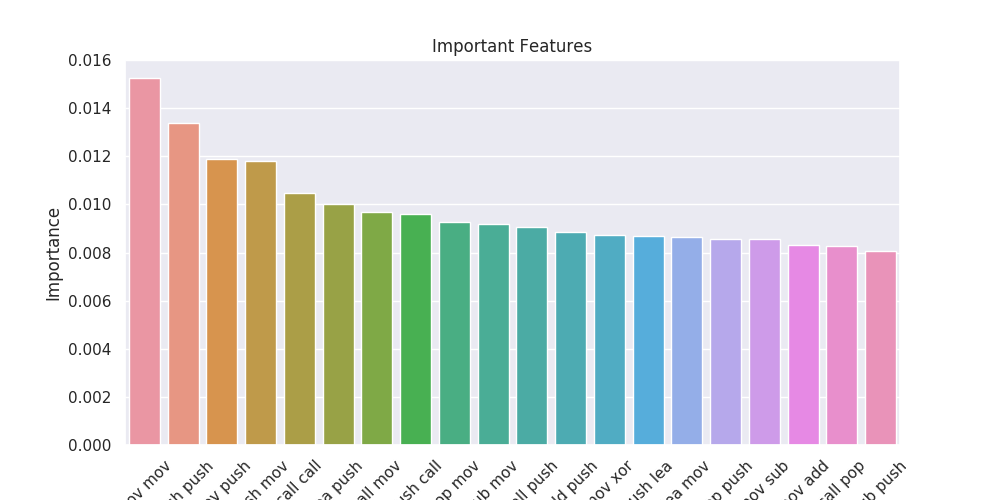

<IPython.core.display.Javascript object>


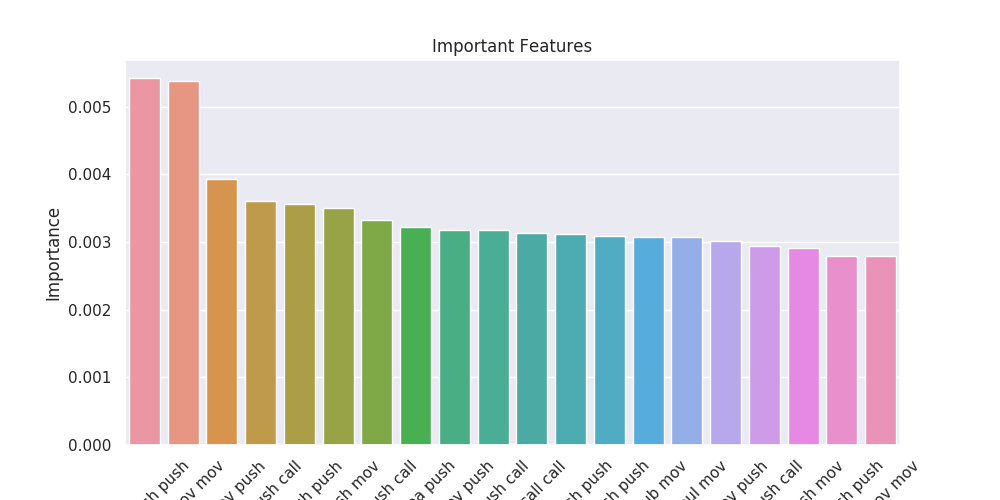

<IPython.core.display.Javascript object>


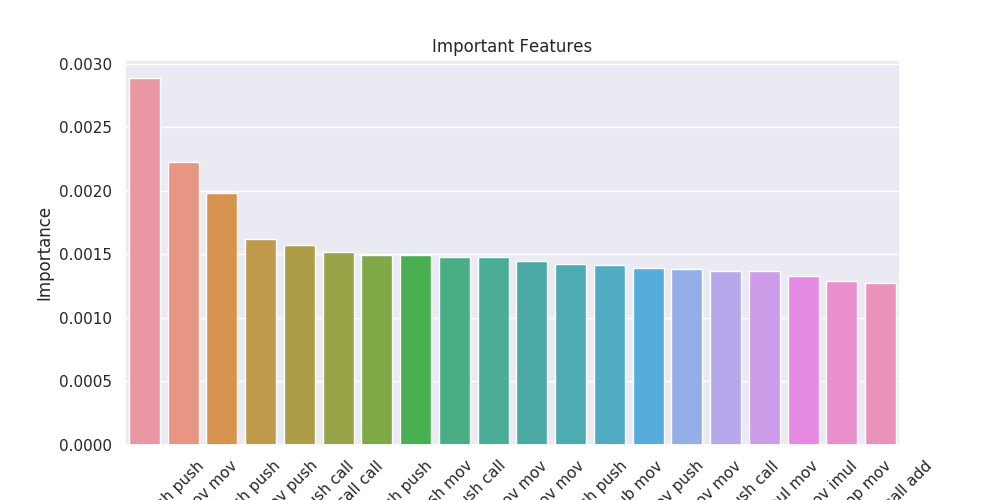

<IPython.core.display.Javascript object>


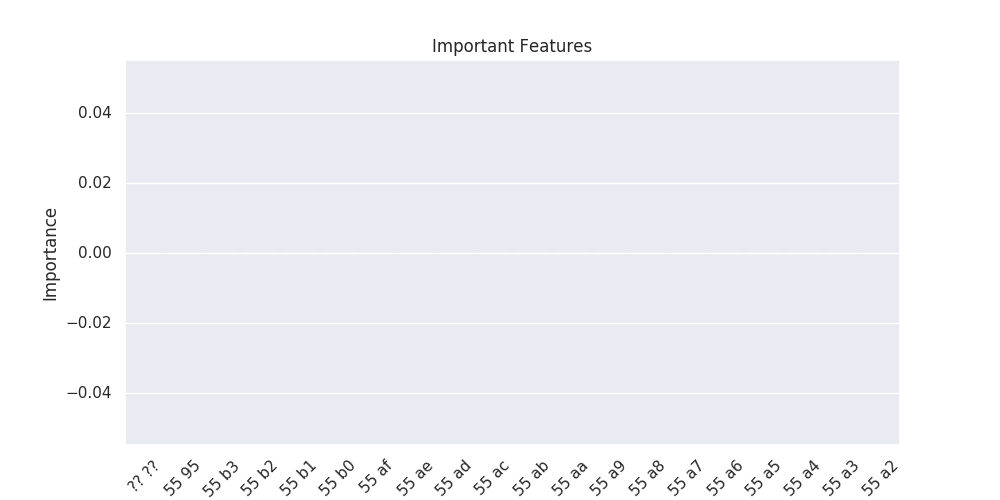

<IPython.core.display.Javascript object>


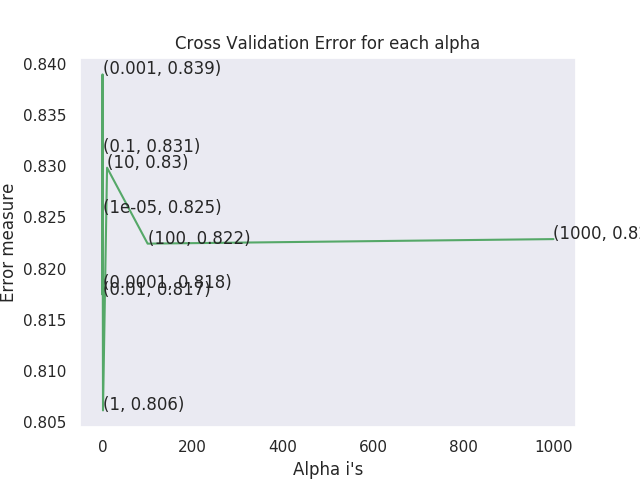

In [135]:
alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(x_trn_final,y_trn_final)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(x_trn_final,y_trn_final)
    predict_y = sig_clf.predict_proba(x_cv_final)
    cv_log_error_array.append(log_loss(y_cv_final, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

log loss for train data 0.7343805192035626
log loss for cv data 0.806108145558151
log loss for test data 0.8258286897332411
Number of misclassified points  20.377184912603497
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


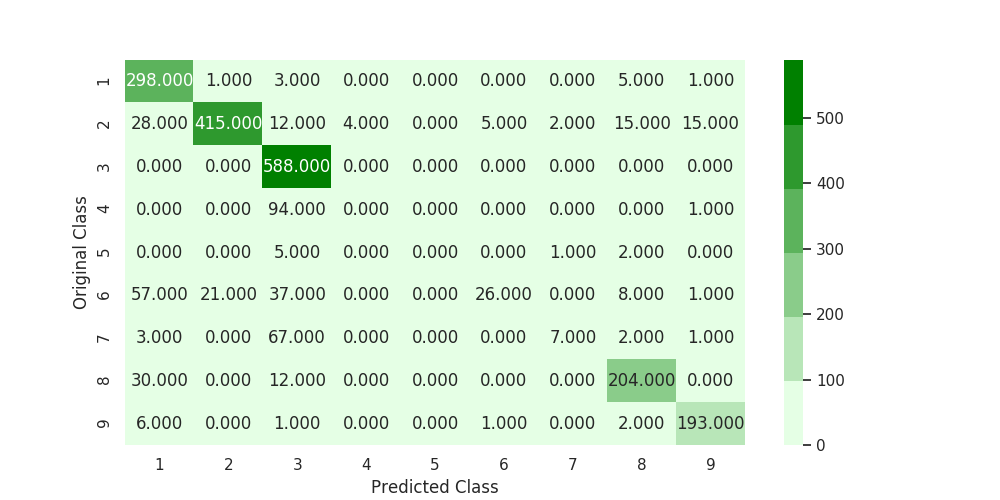

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


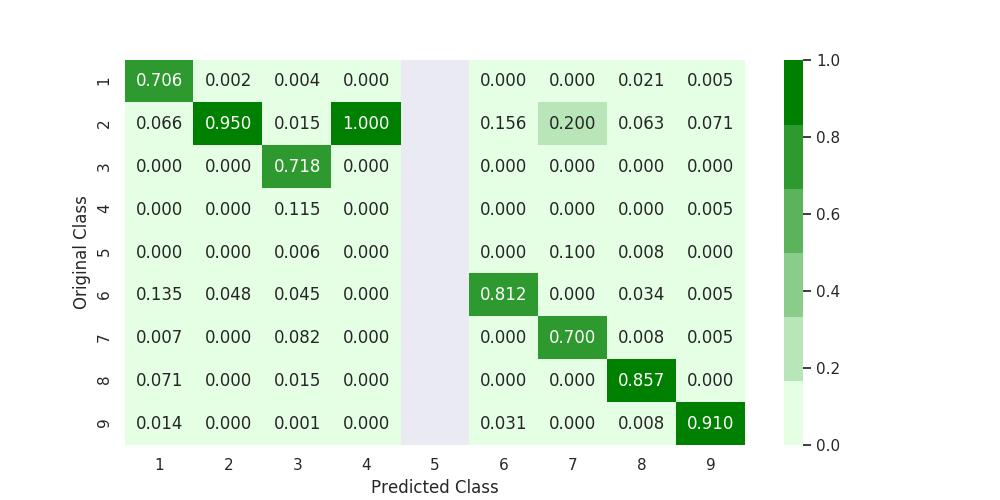

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


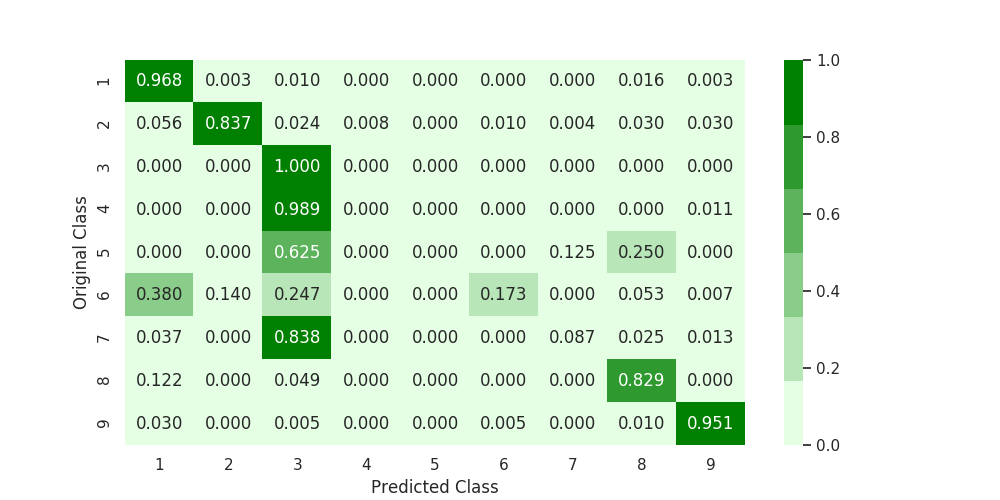

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
TIME: 0:08:34.824412


In [138]:
start=datetime.now()
logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(x_trn_final,y_trn_final)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(x_trn_final,y_trn_final)

predict_y = sig_clf.predict_proba(x_trn_final)
print ('log loss for train data',(log_loss(y_trn_final, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(x_cv_final)
print ('log loss for cv data',(log_loss(y_cv_final, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(x_test_final)
print ('log loss for test data',(log_loss(y_test_final, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_final,sig_clf.predict(x_test_final))
print("TIME:",datetime.now()-start)

# Random Forest

log_loss for c =  10 is 0.07375629171472757
log_loss for c =  50 is 0.06502575609577693
log_loss for c =  100 is 0.06298634684575924
log_loss for c =  500 is 0.06336876588344366
log_loss for c =  1000 is 0.06208412996736361
log_loss for c =  2000 is 0.0619419273441344
log_loss for c =  3000 is 0.061872458439788953


<IPython.core.display.Javascript object>


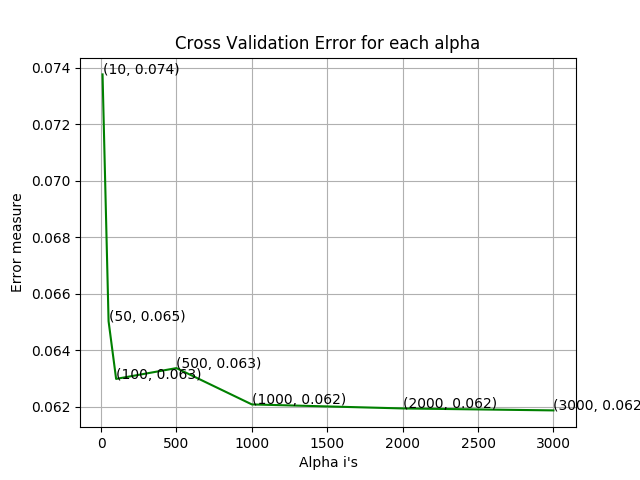

TIME: 0:03:46.468336


In [28]:
start=datetime.now()
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(x_trn_final,y_trn_final)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(x_trn_final,y_trn_final)
    predict_y = sig_clf.predict_proba(x_cv_final)
    cv_log_error_array.append(log_loss(y_cv_final, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
print("TIME:",datetime.now()-start)

For values of best alpha =  3000 The train log loss is: 0.01797300499094392
For values of best alpha =  3000 The cross validation log loss is: 0.061872458439788953
For values of best alpha =  3000 The test log loss is: 0.053175360118905994
Number of misclassified points  1.1039558417663293
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


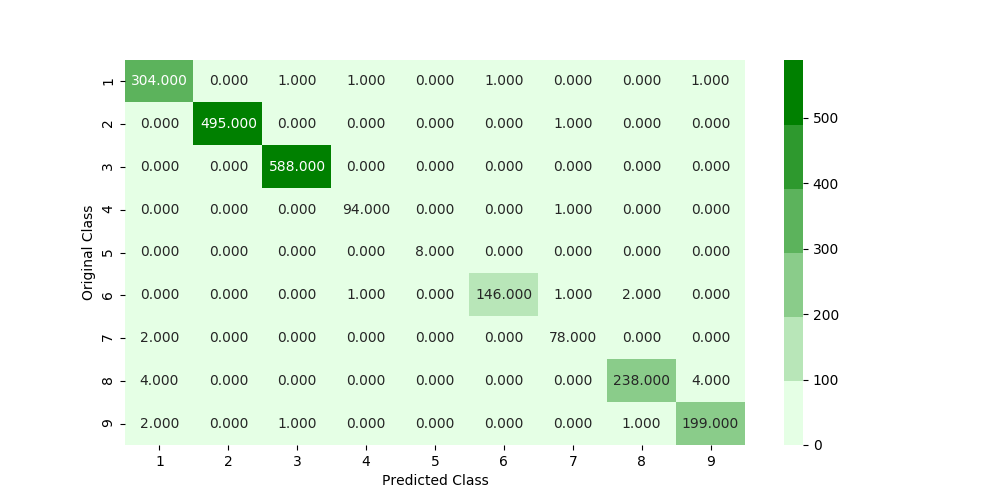

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


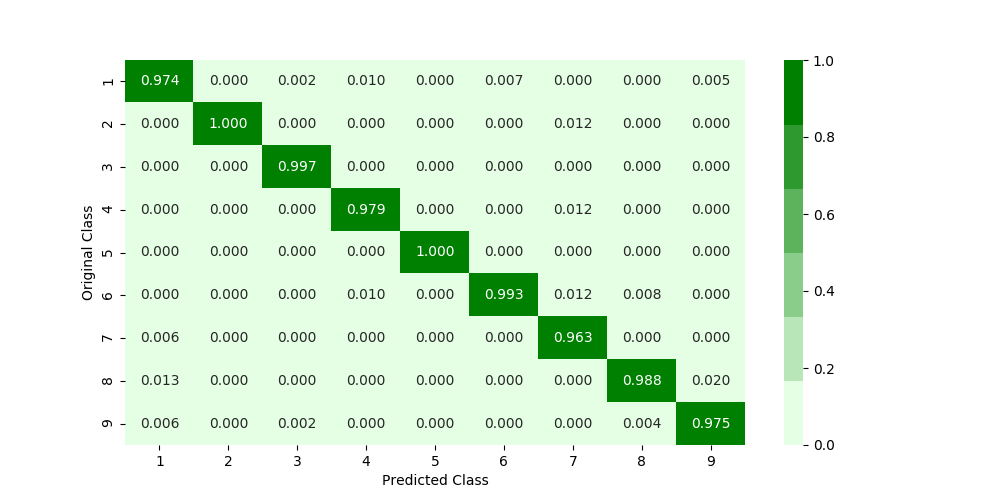

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


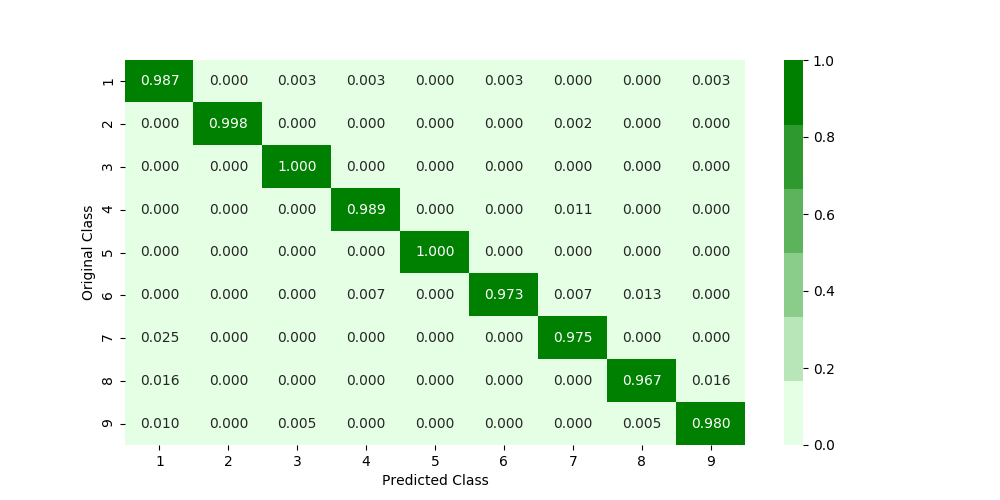

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
TIME: 0:01:51.519738


In [30]:
start=datetime.now()
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(x_trn_final,y_trn_final)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(x_trn_final,y_trn_final)

predict_y = sig_clf.predict_proba(x_trn_final)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_trn_final, predict_y))
predict_y = sig_clf.predict_proba(x_cv_final)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_final, predict_y))
predict_y = sig_clf.predict_proba(x_test_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_final, predict_y))
plot_confusion_matrix(y_test_final,sig_clf.predict(x_test_final))
print("TIME:",datetime.now()-start)

# XGBoost

log_loss for c =  10 is 0.09543647347351272
log_loss for c =  100 is 0.051863000579090546
log_loss for c =  1000 is 0.05276972450052378
log_loss for c =  2000 is 0.052246335488151614


<IPython.core.display.Javascript object>


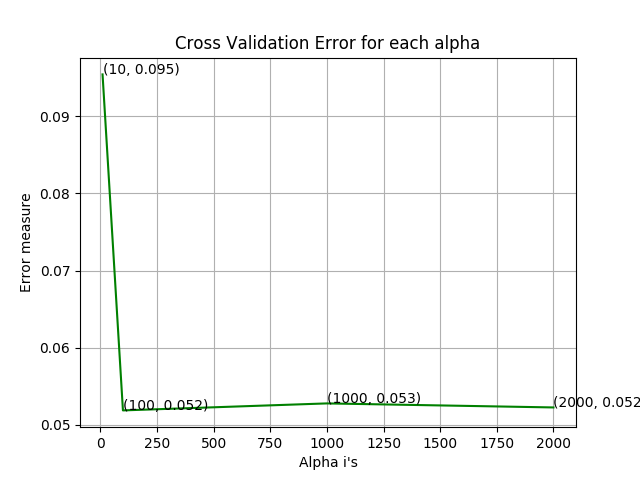

TIME: 0:33:30.753955


In [31]:
start=datetime.now()
alpha=[10,100,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(x_trn_final,y_trn_final)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(x_trn_final, y_trn_final)
    predict_y = sig_clf.predict_proba(x_cv_final)
    cv_log_error_array.append(log_loss(y_cv_final, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
print("TIME:",datetime.now()-start)

For values of best alpha =  100 The train log loss is: 0.0008717404240740024
For values of best alpha =  100 The cross validation log loss is: 0.02145312332450781
For values of best alpha =  100 The test log loss is: 0.01423378888909971
Number of misclassified points  0.41398344066237347
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


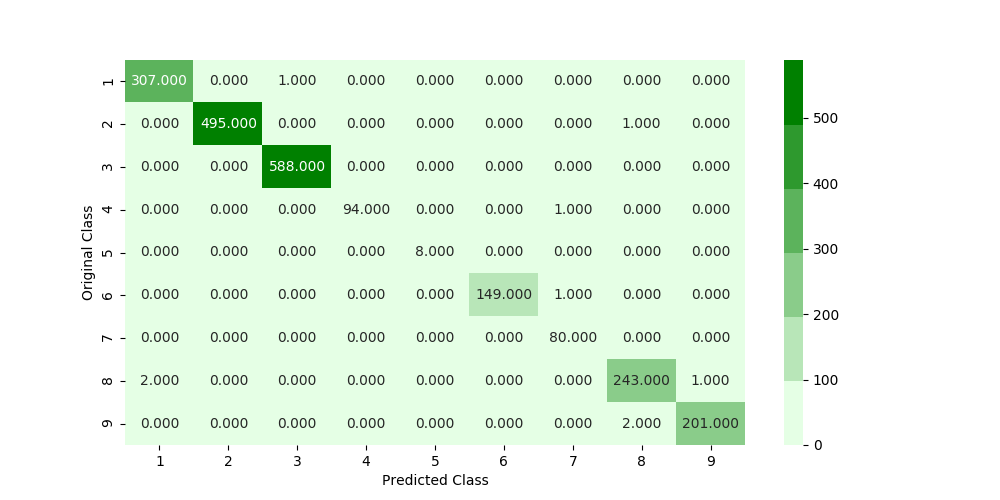

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


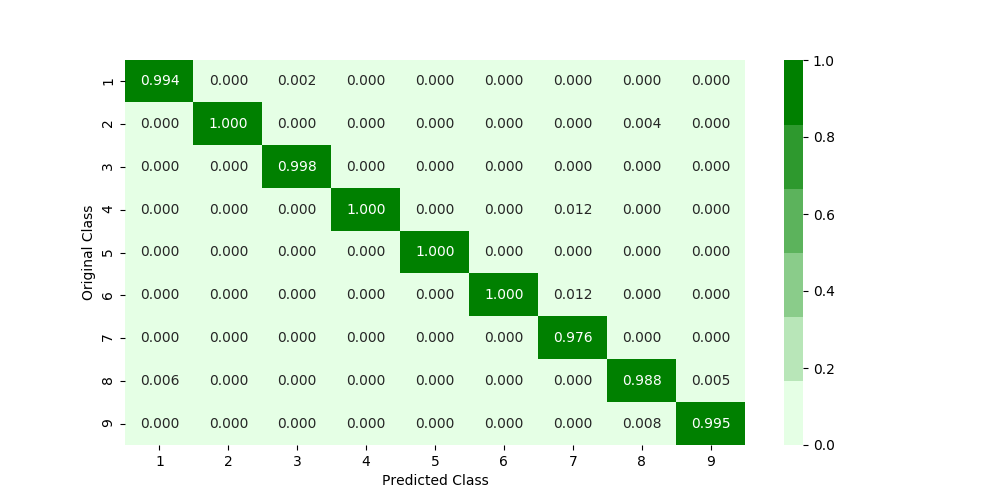

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


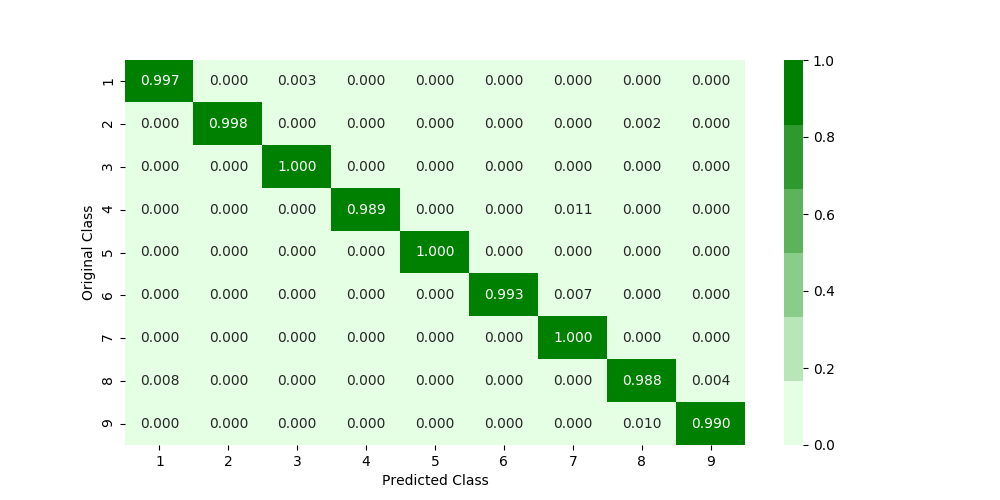

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
TIME: 0:00:18.460578


In [33]:
start=datetime.now()
x_cfl=XGBClassifier(n_estimators=100,max_depth=5,learning_rate=0.2,colsample_bytree=0.3,subsample=1,nthread=-1)
x_cfl.fit(x_trn_final,y_trn_final,verbose=True)

predict_y = x_cfl.predict_proba(x_trn_final)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_trn_final, predict_y))
predict_y = x_cfl.predict_proba(x_cv_final)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_final, predict_y))
predict_y = x_cfl.predict_proba(x_test_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_final, predict_y))
plot_confusion_matrix(y_test_final,x_cfl.predict(x_test_final))
print("TIME:",datetime.now()-start)

# Procedure:-
1. Performed Exploratory data analysis on Bytes files.
2. Extracted bigrams from bytes files.
3. Performed Multi variate analysis on the Bytes features using TSNE.
4. Applied ML models on bytes features -> K-Nearest Neigbors,Logistic regression, Random Forest, XGBoost.
5. Extracted features from ASM files.
6. Performed Multi variate analysis on the ASM features using TSNE.
7. Applied ML models on ASM features -> K-Nearest Neigbors, Logistic regression, Random Forest, XGBoost.
8. Merged both ASM and Bytes features and applied ML models -> Random forest, XgBoost.
9. Extracted ASM image features using https://github.com/dchad/malware-detection
10. Extracted n-grams from ASM files.
11. Merged ASM image features, ASM n-grams and Bytes bi-grams and applied Logistic Regression,XGBoost to further reduce log-loss.

# CONCLUSION:-

In [34]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Comparision "
ptable.field_names = ["Model",'Features','log loss']
ptable.add_row(["Random","Byte files","2.3"])
ptable.add_row(["KNN","Byte files","0.53"])
ptable.add_row(["Logistic Regression","Byte files","0.52"])
ptable.add_row(["Random Forest Classifier ","Byte files","0.07"])
ptable.add_row(["XgBoost Classification","Byte files","0.05"])
ptable.add_row(["\n","\n","\n"])
ptable.add_row(["Knn","Asmfiles","0.08"])
ptable.add_row(["Logistic Regression","Asmfiles","0.36"])
ptable.add_row(["Random Forest Classifier ","Asmfiles","0.03"])
ptable.add_row(["XgBoost Classification","Asmfiles","0.04"])
ptable.add_row(["\n","\n","\n"])
ptable.add_row(["Random Forest Classifier ","Byte files + Asmfiles","0.037"])
ptable.add_row(["XgBoost Classification","Byte files + Asmfiles","0.027"])
ptable.add_row(["\n","\n","\n"])
ptable.add_row(["Linear Regression","Byte files + Asmfiles + Advanced features","0.82"])
ptable.add_row(["Random Forest","Byte files + Asmfiles + Advanced features","0.05"])
ptable.add_row(["XgBoost Classification","Byte files + Asmfiles + Advanced features","0.014"])
print(ptable)

+---------------------------+-------------------------------------------+----------+
|           Model           |                  Features                 | log loss |
+---------------------------+-------------------------------------------+----------+
|           Random          |                 Byte files                |   2.3    |
|            KNN            |                 Byte files                |   0.53   |
|    Logistic Regression    |                 Byte files                |   0.52   |
| Random Forest Classifier  |                 Byte files                |   0.07   |
|   XgBoost Classification  |                 Byte files                |   0.05   |
|                           |                                           |          |
|                           |                                           |          |
|            Knn            |                  Asmfiles                 |   0.08   |
|    Logistic Regression    |                  Asmfiles          